# Player selection Analysis

### Overview 
This project aims to select 14-16 players for the football club "Thunderstrike FC" using player performance data and a limited budget. The report will recommend players based on their skills, potential, and cost efficiency.`
 Thunderstrike FC is gearing up to become a major player in the football world and is on the lookout for top-tier talent to build a competitive team. The goal is to assemble a squad that combines skill, experience, and potential to ensure success both domestically and internationally.
<img src="Designer.png" alt="Design Image" width="1100"/>

### Business Problem
The objective is to select 14-16 players for the main squad, with 18-22 potential candidates under consideration, assuming a budget of £2.5 Billion (average excluding the Wages £416 million). The selection process will be driven by player performance metrics, transfer market value, and budget constraints. The goal is to assemble a highly competitive team while ensuring optimal resource allocation within the given financial limits.

##### More information on team member and their role
- Total Potential Spending Breakdown:
- Manager/Head Coach: £30 million to £100 million (over 3-5 years)
- Assistant Coaches: £10 million to £30 million (over 3-5 years)
- Team Captain: £10 million to £20 million (per year)
- Players (14-16): £912.8 million to £2.2 billion (including transfer fees and wages)
- Medical Staff: £300,000 to £1.5 million (per year)
- Scouts/Analysts: £100,000 to £450,000 (per year)
- Goalkeeping Coach: £300,000 to £800,000 (per year)
- Sports Psychologist: £100,000 to £250,000 (per year)

### Role Distribution Summary
- Goalkeeper: 1
- Defenders: 6
Center Backs: 2, 
Full Backs: 2, 
Wing Backs: 2
-Midfielders: 6
Central Midfielders: 2, 
Attacking Midfielder: 1, 
Defensive Midfielder: 1, 
- Wide Midfielders/Wingers: 2
Forwards: 3, 
Strikers: 2
- Second Striker or Supporting Forward: 1

In [4]:
# importing the required liberies
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',57)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# importing the dataset using the pandas read method
sports = pd.read_csv(r'fifa_eda_stats.csv')

In [6]:
# to explore check the first 5 rows to unsderstand more about the columns and values
sports.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
# to explore check the last 5 rows to understand more about the columns and values
sports.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,"Jul 1, 2017",NaN,2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,34.0,"Apr 24, 2018",NaN,2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [8]:
# inforation about the number of rows and columns
print("Number of Rows:" ,sports.shape[0])
print("Number of columns:", sports.shape[1])

Number of Rows: 18207
Number of columns: 57


In [9]:
# To know about the columns headers
sports.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

### Exploratory Data Analysis (EDA) 
Performing Exploratory Data Analysis (EDA) involves thoroughly examining the dataset to understand its structure, identify any anomalies, and clean the data for better insights. This process includes visualizing data to reveal patterns, trends, and relationships, which helps in making informed decisions and representing the data effectively.

Note: Columns with null values will be dropped to ensure the dataset contains only complete and accurate information, allowing for precise analysis and decision-making when selecting players.

In [11]:
# undering the null value distribution for each columns
sports.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [12]:
# checking the number of null values
sports['Loaned From'].isnull().sum()

16943

In [13]:
# Droping the Loan column 
sports.drop('Loaned From',axis = 1,inplace = True)

In [14]:
# cross verifying the droped column
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [15]:
# Droping the null values from columns Release Clause which will affect in the player budget.
# Created a new data set names 'sports1' to not affect the orginal dataset.
sports1 = sports.dropna(subset=['Release Clause'])

In [16]:
#Checking the more on the null values for further data cleaing
sports1.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

In [17]:
sports1.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,213845.010094,25.226221,66.162771,71.140900,1.114823,2.942919,2.349516,19.657213,49.596167,45.257766,52.120711,58.543952,42.678363,55.104729,47.001562,42.755453,52.635703,58.136274,64.442168,64.548819,63.380701,61.781049,63.902842,55.250916,65.120591,63.160007,65.313946,46.835366,55.924353,46.792285,49.709788,53.299525,48.331911,58.558673,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409
std,30546.285826,4.716588,7.008236,6.151409,0.398559,0.659933,0.755855,16.054811,18.453544,19.538677,17.471305,14.810741,17.740778,19.008604,18.467168,17.547492,15.392385,16.785044,15.043344,14.758874,14.811186,9.119762,14.193035,17.308688,11.856488,16.064355,12.530695,19.334622,17.422401,20.742177,19.611146,14.171630,15.767045,11.539260,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,199569.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,53.000000,30.000000,48.000000,34.000000,30.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221493.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,48.000000,55.000000,62.000000,43.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236802.000000,29.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,61.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [18]:
# setting id as index column
sports1 = sports1.set_index("ID")

In [19]:
sports1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
# Fixing body type column which has incorrect Body Type for players
sports1['Body Type'].value_counts()

Body Type
Normal                 9731
Lean                   5856
Stocky                 1049
Messi                     1
C. Ronaldo                1
Neymar                    1
Courtois                  1
PLAYER_BODY_TYPE_25       1
Shaqiri                   1
Akinfenwa                 1
Name: count, dtype: int64

In [21]:
sports1['Body Type'].replace('Messi','Lean',inplace =True)

In [22]:
sports1['Body Type'].replace('Neymar','Lean',inplace = True)

In [23]:
sports1['Body Type'].replace('Ronaldo','Normal',inplace =True)

In [24]:
sports1['Body Type'].replace('Courtois','Stocky',inplace = True)

In [25]:
sports1['Body Type'].replace('Shaqiri','Stocky',inplace = True)

In [26]:
sports1['Body Type'].replace('Akinfenwa','Stocky',inplace = True)

In [27]:
sports1['Body Type'].replace('C. Ronaldo','Normal',inplace =True)

In [28]:
sports1[sports1['Body Type'].str.contains("PLAYER_BODY_TYPE_25")]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
209331,M. Salah,26,Egypt,88,89,Liverpool,€69.5M,€255K,Left,3.0,3.0,4.0,High/ Medium,PLAYER_BODY_TYPE_25,RM,10.0,"Jul 1, 2017",2023,5'9,157lbs,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M


In [29]:
sports1['Body Type'].replace('PLAYER_BODY_TYPE_25','Lean',inplace =True)

In [30]:
sports1['Body Type'].value_counts()

Body Type
Normal    9732
Lean      5859
Stocky    1052
Name: count, dtype: int64

In [31]:
# replacing the '€','M','K' for the following columns Value, Wage, and Release Clause
sports1['Value'] = sports1['Value'].str.replace('€', '')

In [32]:
def convert_to_int(value):
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1_000_000)
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1_000)
    else:
        return int(value)

# Apply the function to the 'Amount' column
sports1['Value'] = sports1['Value'].apply(convert_to_int)

In [33]:
sports1['Value'].dtype

dtype('int64')

In [34]:
sports1['Wage'] = sports1['Wage'].str.replace('€', '')

In [35]:
def convert_to_int(wage):
    if 'M' in wage:
        return int(float(wage.replace('M', '')) * 1_000_000)
    elif 'K' in wage:
        return int(float(wage.replace('K', '')) * 1_000)
    else:
        return int(wage)

# Apply the function to the 'wage' column
sports1['Wage'] = sports1['Wage'].apply(convert_to_int)

In [36]:
# replacing the value with the nothing
sports1['Release Clause'] = sports1['Release Clause'].str.replace('€', '')

In [37]:
#converting the value to the int type and removing 'M' or 'K'
def convert_to_int(wage):
    if 'M' in wage:
        return int(float(wage.replace('M', '')) * 1_000_000)
    elif 'K' in wage:
        return int(float(wage.replace('K', '')) * 1_000)
    else:
        return int(wage)

# Apply the function to the 'Amount' column
sports1['Release Clause'] = sports1['Release Clause'].apply(convert_to_int)

In [38]:
# To observe that changes for columns 
sports1['Release Clause'].dtype

dtype('int64')

In [39]:
# replacing 'lbs' with nothing for the weight column
sports1['Weight'] = sports1['Weight'].str.replace('lbs','')

In [40]:
# changing the data type to float type
sports1['Weight'] = sports1['Weight'].astype(np.float32)

In [41]:
sports1['Weight'].dtype

dtype('float32')

In [42]:
# converting the height form 'feet' to 'cm'
def height_to_cm(height):
    # Split the height into feet and inches
    feet, inches = height.split("'")
    inches = inches.replace("\"", "")  # Remove any double quotes
    
    # Convert feet and inches to cm
    feet = int(feet)
    inches = int(inches)
    
    height_cm = (feet * 30.48) + (inches * 2.54)
    return height_cm

# Apply the conversion function to the 'Height' column
sports1['Height'] = sports1['Height'].apply(height_to_cm)

In [43]:
# to verify the changes
sports1['Height'].head()

ID
158023    170.18
20801     187.96
190871    175.26
193080    193.04
192985    180.34
Name: Height, dtype: float64

In [44]:
# changing the datatype of jersey Number to int
sports1['Jersey Number'] = sports1['Jersey Number'].astype(np.int32)

In [45]:
# to check the dtpe of jersey number
sports1['Jersey Number'].dtype

dtype('int32')

### EDA Completion Statement
This concludes the current phase of Exploratory Data Analysis (EDA). As EDA is an iterative process, we acknowledge that future insights or requirements may necessitate revisiting this analysis. Should new data be introduced or additional patterns need to be explored, we will conduct further EDA as needed.

### General Analysis: Visualizing Dataset and Value Distribution

In [48]:
# using the 'bmh for the plot style from the matplotlib liberary 
plt.style.use('bmh')

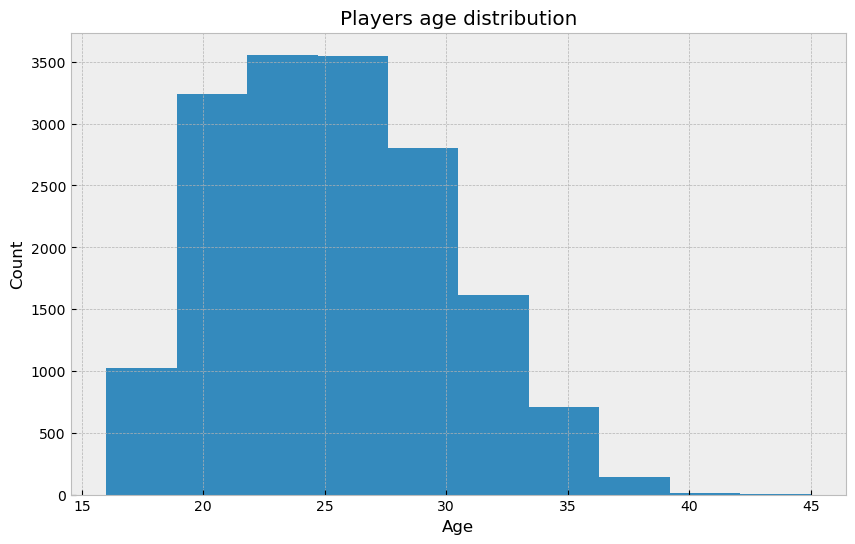

In [49]:
# Age distribution of the players
plt.figure(figsize = (10,6))
plt.hist(sports1['Age'])
plt.title("Players age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### The distribution plot indicates that the majority of players are between the ages of 19 and 30. This information is valuable as we are looking to recruit younger players for our newly formed team. Focusing on this age range will not only strengthen the current team but also contribute to building a strong future roster.

In [51]:
body_type = sports1['Body Type'].value_counts()

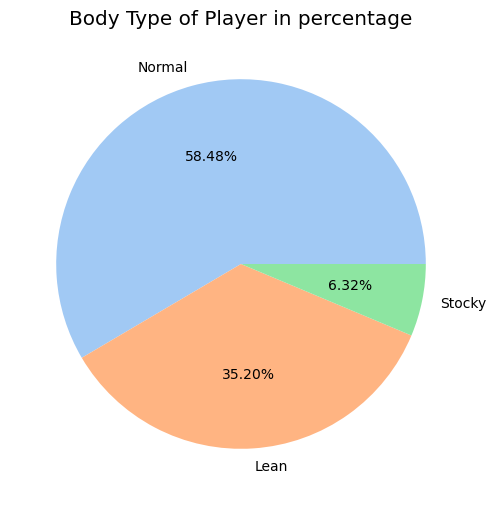

In [52]:
# percentage distribution of the player body type in the dataset
plt.figure(figsize = (8,6))
plt.pie(body_type,labels = body_type.index,autopct = '%1.2f%%',colors=sns.color_palette('pastel'))
plt.title("Body Type of Player in percentage")
plt.show()

##### The body type of players will impact the team’s performance and strategy. It is essential to take this into consideration when making team decisions.
- Stocky: Defensive roles, target forwards.
- Lean: Fast-paced and high-stamina roles.
- Normal: Versatile positions or roles needing balanced attributes.

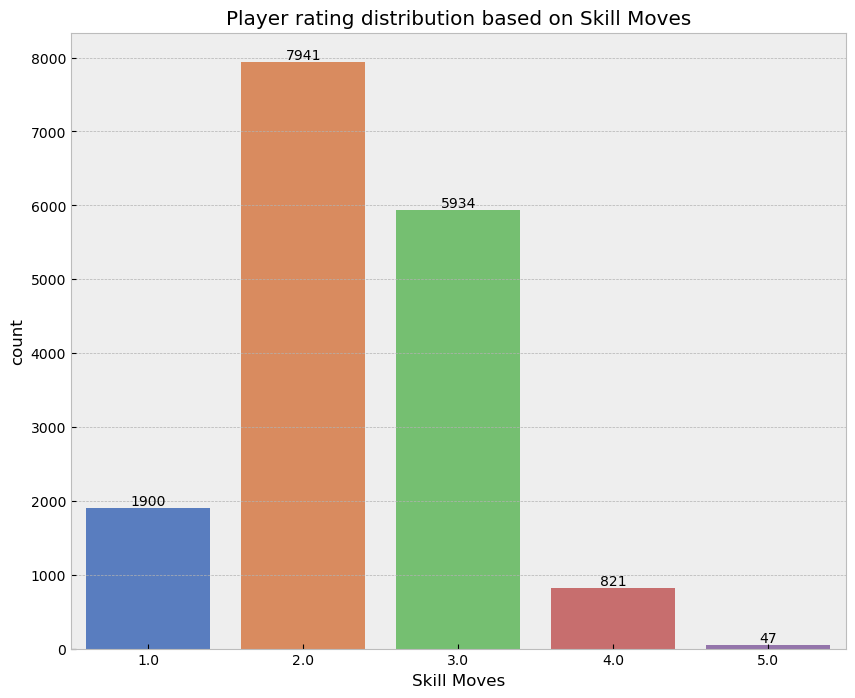

In [54]:
# Player rating distribution based on there skill moves
plt.figure(figsize=(10,8))
ax = sns.countplot(data = sports1, x = sports1['Skill Moves'],palette = "muted")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Player rating distribution based on Skill Moves")
plt.show()

#### Skill moves can be valuable in any attacking position were breaking down defences and creating scoring opportunities are key responsibilities.
There are only 47 people with 5 rating and 821 with 4 rating should look for them during the selection.


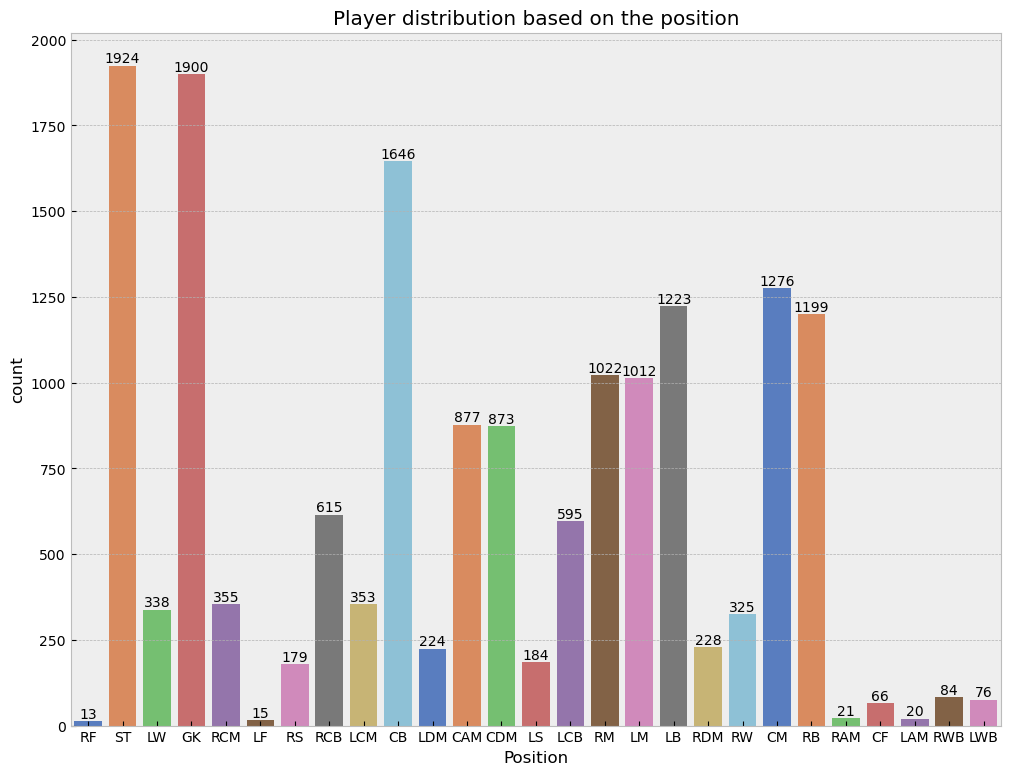

In [56]:
# player distribution based on the position
plt.figure(figsize = (12,9))
ax = sns.countplot(data = sports1,x = 'Position',palette= "muted") 
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Player distribution based on the position")
plt.show()

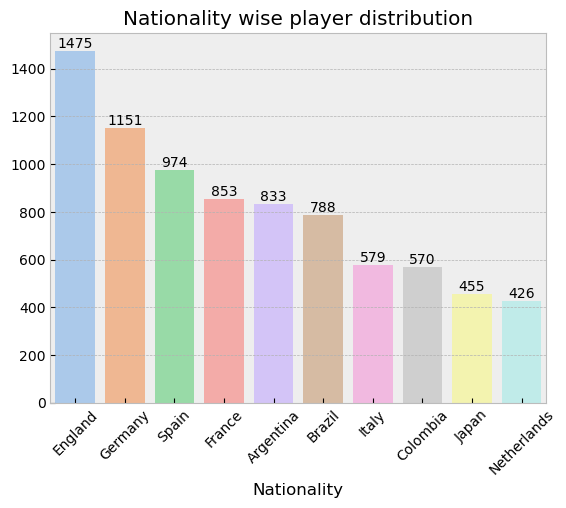

In [57]:
# Player count based on the 10 nationality
top_10_nationality = sports1['Nationality'].value_counts().head(10)
ax = sns.barplot(x = top_10_nationality.index,y=top_10_nationality.values,palette= 'pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Nationality wise player distribution')
plt.xticks(rotation=45)
plt.show()

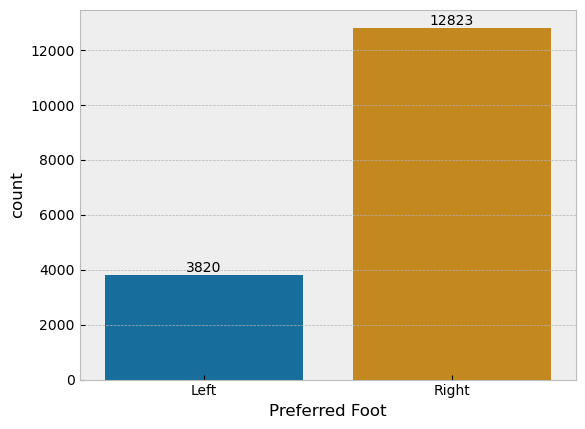

In [58]:
# player distribution based on preferred foot
ax = sns.countplot(data = sports1,x= sports1['Preferred Foot'], palette = 'colorblind')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Selecting the best player for the team

In [60]:
sports1['Position'].value_counts()

Position
ST     1924
GK     1900
CB     1646
CM     1276
LB     1223
RB     1199
RM     1022
LM     1012
CAM     877
CDM     873
RCB     615
LCB     595
RCM     355
LCM     353
LW      338
RW      325
RDM     228
LDM     224
LS      184
RS      179
RWB      84
LWB      76
CF       66
RAM      21
LAM      20
LF       15
RF       13
Name: count, dtype: int64

# Goal Keeper
#### First and most importent positions is of goal keeper key columns to focus on are 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'.

In [62]:
# Sorting the top 10 goal keepers based on the column to find the player with higest skills
Top10GK = sports1.sort_values(by=['GKReflexes','GKPositioning','GKHandling','GKDiving','GKKicking'],ascending=False).head(10)
Top10GK

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1,"Jul 1, 2011",2020,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
167948,H. Lloris,31,France,88,88,Tottenham Hotspur,36000000,150000,Left,4.0,1.0,1.0,Medium/ Medium,Lean,GK,1,"Aug 1, 2012",2022,187.96,181.0,13.0,10.0,10.0,50.0,11.0,10.0,11.0,10.0,50.0,34.0,65.0,62.0,55.0,85.0,54.0,23.0,74.0,41.0,43.0,14.0,31.0,27.0,10.0,30.0,40.0,65.0,29.0,10.0,18.0,88.0,84.0,68.0,83.0,92.0,66599999
192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000,240000,Right,3.0,4.0,1.0,Medium/ Medium,Normal,GK,22,"Jul 1, 2014",2022,187.96,187.0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000
193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30500000,195000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Aug 3, 2014",2020,185.42,176.0,11.0,15.0,11.0,30.0,11.0,16.0,11.0,15.0,37.0,19.0,54.0,53.0,60.0,84.0,61.0,21.0,74.0,39.0,75.0,13.0,32.0,20.0,16.0,68.0,25.0,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000
198009,M. Perin,25,Italy,84,89,Juventus,29500000,105000,Right,2.0,3.0,1.0,Medium/ Medium,Lean,GK,22,"Jul 1, 2018",2022,187.96,170.0,11.0,11.0,12.0,33.0,19.0,19.0,15.0,13.0,31.0,23.0,57.0,56.0,70.0,79.0,30.0,23.0,75.0,30.0,52.0,17.0,25.0,19.0,12.0,44.0,21.0,65.0,20.0,12.0,19.0,81.0,85.0,71.0,79.0,90.0,50900000
162835,S. Handanovič,33,Slovenia,88,88,Inter,30000000,110000,Right,3.0,2.0,1.0,Medium/ Medium,Normal,GK,1,"Jul 1, 2012",2021,193.04,203.0,12.0,10.0,10.0,36.0,12.0,12.0,12.0,14.0,34.0,16.0,51.0,55.0,47.0,83.0,36.0,22.0,78.0,41.0,71.0,19.0,25.0,22.0,12.0,41.0,23.0,69.0,25.0,10.0,13.0,87.0,86.0,69.0,89.0,89.0,51000000
200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Jul 16, 2014",2021,187.96,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000
192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500000,240000,Left,4.0,2.0,1.0,Medium/ Medium,Stocky,GK,1,"Aug 9, 2018",2024,198.12,212.0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000
212831,Alisson,25,Brazil,85,90,Liverpool,36500000,115000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,13,"Jul 19, 2018",2024,190.50,201.0,17.0,13.0,19.0,45.0,20.0,27.0,19.0,18.0,44.0,30.0,54.0,45.0,40.0,84.0,37.0,21.0,52.0,32.0,78.0,14.0,27.0,11.0,13.0,66.0,23.0,65.0,15.0,19.0,16.0,83.0,81.0,85.0,84.0,88.0,72100000


In [63]:
# filtering the age between 25 to 32
Top10GKAge = Top10GK[(Top10GK['Age'] >= 25) & (Top10GK['Age'] <= 32)]
Top10GKAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1,"Jul 1, 2011",2020,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
167948,H. Lloris,31,France,88,88,Tottenham Hotspur,36000000,150000,Left,4.0,1.0,1.0,Medium/ Medium,Lean,GK,1,"Aug 1, 2012",2022,187.96,181.0,13.0,10.0,10.0,50.0,11.0,10.0,11.0,10.0,50.0,34.0,65.0,62.0,55.0,85.0,54.0,23.0,74.0,41.0,43.0,14.0,31.0,27.0,10.0,30.0,40.0,65.0,29.0,10.0,18.0,88.0,84.0,68.0,83.0,92.0,66599999
192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000,240000,Right,3.0,4.0,1.0,Medium/ Medium,Normal,GK,22,"Jul 1, 2014",2022,187.96,187.0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000
193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30500000,195000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Aug 3, 2014",2020,185.42,176.0,11.0,15.0,11.0,30.0,11.0,16.0,11.0,15.0,37.0,19.0,54.0,53.0,60.0,84.0,61.0,21.0,74.0,39.0,75.0,13.0,32.0,20.0,16.0,68.0,25.0,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000
198009,M. Perin,25,Italy,84,89,Juventus,29500000,105000,Right,2.0,3.0,1.0,Medium/ Medium,Lean,GK,22,"Jul 1, 2018",2022,187.96,170.0,11.0,11.0,12.0,33.0,19.0,19.0,15.0,13.0,31.0,23.0,57.0,56.0,70.0,79.0,30.0,23.0,75.0,30.0,52.0,17.0,25.0,19.0,12.0,44.0,21.0,65.0,20.0,12.0,19.0,81.0,85.0,71.0,79.0,90.0,50900000
200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Jul 16, 2014",2021,187.96,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000
192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500000,240000,Left,4.0,2.0,1.0,Medium/ Medium,Stocky,GK,1,"Aug 9, 2018",2024,198.12,212.0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000
212831,Alisson,25,Brazil,85,90,Liverpool,36500000,115000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,13,"Jul 19, 2018",2024,190.50,201.0,17.0,13.0,19.0,45.0,20.0,27.0,19.0,18.0,44.0,30.0,54.0,45.0,40.0,84.0,37.0,21.0,52.0,32.0,78.0,14.0,27.0,11.0,13.0,66.0,23.0,65.0,15.0,19.0,16.0,83.0,81.0,85.0,84.0,88.0,72100000
190941,L. Hrádecký,28,Finland,84,84,Bayer 04 Leverkusen,22000000,74000,Right,2.0,3.0,1.0,Medium/ Medium,Lean,GK,1,"Jul 1, 2018",2023,193.04,187.0,11.0,11.0,11.0,15.0,9.0,10.0,11.0,15.0,20.0,20.0,38.0,44.0,43.0,83.0,39.0,14.0,69.0,34.0,55.0,14.0,31.0,18.0,9.0,53.0,20.0,48.0,10.0,10.0,13.0,85.0,79.0,68.0,82.0,88.0,37400000


In [64]:
# filtering based on International reputation  above 3
TopIR = Top10GKAge[Top10GKAge['International Reputation']>=3]
TopIR

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1,"Jul 1, 2011",2020,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
167948,H. Lloris,31,France,88,88,Tottenham Hotspur,36000000,150000,Left,4.0,1.0,1.0,Medium/ Medium,Lean,GK,1,"Aug 1, 2012",2022,187.96,181.0,13.0,10.0,10.0,50.0,11.0,10.0,11.0,10.0,50.0,34.0,65.0,62.0,55.0,85.0,54.0,23.0,74.0,41.0,43.0,14.0,31.0,27.0,10.0,30.0,40.0,65.0,29.0,10.0,18.0,88.0,84.0,68.0,83.0,92.0,66599999
192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000,240000,Right,3.0,4.0,1.0,Medium/ Medium,Normal,GK,22,"Jul 1, 2014",2022,187.96,187.0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000
193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30500000,195000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Aug 3, 2014",2020,185.42,176.0,11.0,15.0,11.0,30.0,11.0,16.0,11.0,15.0,37.0,19.0,54.0,53.0,60.0,84.0,61.0,21.0,74.0,39.0,75.0,13.0,32.0,20.0,16.0,68.0,25.0,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000
200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Jul 16, 2014",2021,187.96,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000
192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500000,240000,Left,4.0,2.0,1.0,Medium/ Medium,Stocky,GK,1,"Aug 9, 2018",2024,198.12,212.0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000
212831,Alisson,25,Brazil,85,90,Liverpool,36500000,115000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,13,"Jul 19, 2018",2024,190.50,201.0,17.0,13.0,19.0,45.0,20.0,27.0,19.0,18.0,44.0,30.0,54.0,45.0,40.0,84.0,37.0,21.0,52.0,32.0,78.0,14.0,27.0,11.0,13.0,66.0,23.0,65.0,15.0,19.0,16.0,83.0,81.0,85.0,84.0,88.0,72100000


In [65]:
# filtering based on release clasuse buget above 100 million
BudgetReleaseClause = TopIR[TopIR['Release Clause'] > 100000000]
BudgetReleaseClause

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1,"Jul 1, 2011",2020,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000,240000,Right,3.0,4.0,1.0,Medium/ Medium,Normal,GK,22,"Jul 1, 2014",2022,187.96,187.0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000
200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,1,"Jul 16, 2014",2021,187.96,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000
192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500000,240000,Left,4.0,2.0,1.0,Medium/ Medium,Stocky,GK,1,"Aug 9, 2018",2024,198.12,212.0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000


#### Conclusion for Goalkeeper Position

After thorough analysis, **De Gea** is the best player for the Goalkeeper position with the highest reflexes and top overall rating, at a cost of €138.7 million. **Marc-André ter Stegen**, with a cost of €123.3 million, is also a strong contender.

# Defenders
#### Second and most importent positions is of Defenders key columns to focus on are  'Marking', 'Standing Tackle', 'Heading Accuracy', 'Strength', and 'Positioning', 'Sprint Speed', 'Stamina', 'Weak Foot'.

#### Center Back

In [69]:
# filtering the position to the center back
CBDEF = sports1[sports1['Position'] == 'CB']

In [70]:
# Sorting the top 10 center back based on the column to find the player with higest ratings
Top10CB = CBDEF.sort_values(by=['Overall','Height','Positioning','HeadingAccuracy'],ascending=False).head(10)
Top10CB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000,125000,Right,3.0,3.0,2.0,Medium/ High,Lean,CB,10,"Aug 4, 2010",2019,187.96,172.0,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000
205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000,205000,Left,3.0,3.0,2.0,Medium/ High,Normal,CB,23,"Jul 12, 2016",2023,182.88,165.0,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,121100000
177509,M. Benatia,31,Morocco,86,86,Juventus,30000000,160000,Right,3.0,3.0,2.0,Medium/ High,Normal,CB,4,"Aug 26, 2014",2020,187.96,207.0,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,64.0,65.0,75.0,59.0,82.0,53.0,66.0,85.0,69.0,91.0,24.0,86.0,86.0,38.0,47.0,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,49500000
171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000,38000,Right,3.0,4.0,2.0,Medium/ Medium,Lean,CB,29,"Jul 1, 2016",2020,198.12,201.0,45.0,57.0,94.0,76.0,60.0,60.0,52.0,76.0,70.0,68.0,60.0,65.0,46.0,85.0,36.0,92.0,45.0,61.0,83.0,82.0,72.0,83.0,53.0,59.0,60.0,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,15300000
139720,V. Kompany,32,Belgium,85,85,Manchester City,22000000,170000,Right,4.0,3.0,2.0,Medium/ High,Normal,CB,4,"Aug 22, 2008",2019,190.50,187.0,61.0,45.0,84.0,73.0,46.0,63.0,61.0,52.0,66.0,70.0,52.0,59.0,57.0,87.0,41.0,75.0,72.0,66.0,87.0,55.0,87.0,82.0,41.0,59.0,63.0,81.0,87.0,85.0,84.0,10.0,9.0,5.0,8.0,6.0,40700000
168609,Miranda,33,Brazil,85,85,Inter,15500000,96000,Right,3.0,3.0,2.0,Medium/ High,Lean,CB,23,"Jul 1, 2017",2020,185.42,172.0,48.0,43.0,80.0,70.0,51.0,67.0,32.0,39.0,69.0,73.0,66.0,69.0,61.0,81.0,57.0,70.0,82.0,65.0,79.0,41.0,83.0,85.0,43.0,58.0,49.0,81.0,90.0,90.0,85.0,12.0,6.0,10.0,13.0,12.0,26400000
192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000,170000,Right,3.0,3.0,2.0,High/ High,Normal,CB,30,"Aug 20, 2015",2022,182.88,179.0,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,57.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,52700000
212190,N. Süle,22,Germany,84,90,FC Bayern München,36500000,84000,Right,2.0,3.0,2.0,Medium/ Medium,Stocky,CB,15,"Jul 1, 2017",2022,195.58,214.0,30.0,20.0,86.0,78.0,31.0,42.0,28.0,30.0,63.0,63.0,52.0,84.0,33.0,79.0,33.0,77.0,38.0,65.0,94.0,62.0,82.0,82.0,26.0,30.0,32.0,72.0,82.0,85.0,83.0,15.0,7.0,14.0,7.0,15.0,67500000
198176,S. de Vrij,26,Netherlands,84,86,Inter,31500000,88000,Right,3.0,4.0,2.0,Medium/ High,Normal,CB,14,"Jul 1, 2018",2023,187.96,172.0,49.0,25.0,80.0,71.0,27.0,63.0,45.0,16.0,71.0,71.0,67.0,69.0,61.0,80.0,59.0,65.0,76.0,66.0,80.0,60.0,78.0,87.0,32.0,59.0,41.0,82.0,88.0,87.0,83.0,8.0,10.0,7.0,14.0,13.0,55900000


In [71]:
# filtering the age between 25 to 30
Top10CBAge = Top10CB[(Top10CB['Age'] >= 20) & (Top10CB['Age'] <= 30)]
Top10CBAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000,205000,Left,3.0,3.0,2.0,Medium/ High,Normal,CB,23,"Jul 12, 2016",2023,182.88,165.0,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,121100000
192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000,170000,Right,3.0,3.0,2.0,High/ High,Normal,CB,30,"Aug 20, 2015",2022,182.88,179.0,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,57.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,52700000
212190,N. Süle,22,Germany,84,90,FC Bayern München,36500000,84000,Right,2.0,3.0,2.0,Medium/ Medium,Stocky,CB,15,"Jul 1, 2017",2022,195.58,214.0,30.0,20.0,86.0,78.0,31.0,42.0,28.0,30.0,63.0,63.0,52.0,84.0,33.0,79.0,33.0,77.0,38.0,65.0,94.0,62.0,82.0,82.0,26.0,30.0,32.0,72.0,82.0,85.0,83.0,15.0,7.0,14.0,7.0,15.0,67500000
198176,S. de Vrij,26,Netherlands,84,86,Inter,31500000,88000,Right,3.0,4.0,2.0,Medium/ High,Normal,CB,14,"Jul 1, 2018",2023,187.96,172.0,49.0,25.0,80.0,71.0,27.0,63.0,45.0,16.0,71.0,71.0,67.0,69.0,61.0,80.0,59.0,65.0,76.0,66.0,80.0,60.0,78.0,87.0,32.0,59.0,41.0,82.0,88.0,87.0,83.0,8.0,10.0,7.0,14.0,13.0,55900000


#### After thorough analysis, **N. Süle** and **S. de Vrij** are identified as the most suitable options for the Center Back position at the price of €67.5 and €55.9 million respectively also if the budget is available can consider **S. Umtiti** €121.1 million

#### Full Backs

In [74]:
# filtering the position to the left back or right back
FBDEF = sports1[(sports1['Position'] == 'LB') | (sports1['Position'] == 'RB')]
FBDEF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000,285000,Left,4.0,4.0,5.0,High/ Low,Normal,LB,12,"Jan 1, 2007",2022,175.26,176.0,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000
189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000,250000,Left,3.0,3.0,3.0,High/ Medium,Normal,LB,18,"Jul 1, 2012",2020,170.18,150.0,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,93.0,93.0,90.0,83.0,85.0,64.0,81.0,91.0,61.0,66.0,75.0,84.0,79.0,70.0,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000
191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000,160000,Left,3.0,3.0,3.0,High/ High,Normal,LB,12,"Aug 21, 2015",2020,180.34,176.0,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,81.0,83.0,86.0,79.0,84.0,78.0,80.0,79.0,92.0,79.0,72.0,82.0,82.0,70.0,70.0,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,60200000
184432,Azpilicueta,28,Spain,86,86,Chelsea,35000000,175000,Right,3.0,3.0,2.0,Medium/ Medium,Normal,RB,14,"Aug 24, 2012",2022,177.80,168.0,81.0,46.0,76.0,81.0,51.0,69.0,68.0,58.0,80.0,77.0,76.0,76.0,72.0,88.0,73.0,68.0,76.0,87.0,71.0,60.0,82.0,89.0,62.0,74.0,66.0,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,64800000
197445,D. Alaba,26,Austria,85,87,FC Bayern München,38000000,110000,Left,4.0,4.0,3.0,High/ Medium,Lean,LB,8,"Feb 10, 2010",2021,180.34,168.0,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,83.0,79.0,86.0,79.0,84.0,77.0,83.0,82.0,87.0,71.0,82.0,69.0,84.0,76.0,77.0,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,65599999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245734,C. Maher,17,Republic of Ireland,48,66,Bray Wanderers,50000,1000,Right,1.0,2.0,2.0,Medium/ Medium,Lean,RB,32,"Jan 1, 2017",2018,180.34,134.0,45.0,46.0,46.0,38.0,27.0,46.0,28.0,24.0,34.0,38.0,61.0,57.0,56.0,47.0,66.0,39.0,59.0,60.0,48.0,33.0,53.0,46.0,43.0,37.0,33.0,38.0,43.0,49.0,45.0,8.0,10.0,12.0,9.0,10.0,109000
240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,40000,1000,Right,1.0,3.0,2.0,High/ Medium,Lean,RB,33,"Jul 1, 2017",2020,177.80,161.0,39.0,40.0,45.0,46.0,42.0,46.0,35.0,29.0,22.0,49.0,65.0,62.0,68.0,44.0,70.0,44.0,69.0,61.0,59.0,41.0,38.0,36.0,44.0,38.0,47.0,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000
245570,J. Norville-Williams,18,England,47,65,Cambridge United,50000,1000,Left,1.0,3.0,2.0,Medium/ High,Lean,LB,24,"Jul 1, 2018",2021,180.34,168.0,47.0,26.0,39.0,39.0,27.0,45.0,29.0,21.0,41.0,41.0,61.0,52.0,55.0,45.0,59.0,26.0,61.0,38.0,55.0,25.0,55.0,55.0,47.0,39.0,29.0,36.0,45.0,42.0,46.0,15.0,13.0,6.0,14.0,12.0,119000


In [75]:
# Sorting the top 10 left back or right back based on the column to find the player with higest ratings
Top10FB = FBDEF.sort_values(by=['Overall','SprintSpeed','Acceleration','Stamina'],ascending=False).head(10)
Top10FB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000,285000,Left,4.0,4.0,5.0,High/ Low,Normal,LB,12,"Jan 1, 2007",2022,175.26,176.0,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000
189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000,250000,Left,3.0,3.0,3.0,High/ Medium,Normal,LB,18,"Jul 1, 2012",2020,170.18,150.0,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,93.0,93.0,90.0,83.0,85.0,64.0,81.0,91.0,61.0,66.0,75.0,84.0,79.0,70.0,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000
191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000,160000,Left,3.0,3.0,3.0,High/ High,Normal,LB,12,"Aug 21, 2015",2020,180.34,176.0,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,81.0,83.0,86.0,79.0,84.0,78.0,80.0,79.0,92.0,79.0,72.0,82.0,82.0,70.0,70.0,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,60200000
184432,Azpilicueta,28,Spain,86,86,Chelsea,35000000,175000,Right,3.0,3.0,2.0,Medium/ Medium,Normal,RB,14,"Aug 24, 2012",2022,177.80,168.0,81.0,46.0,76.0,81.0,51.0,69.0,68.0,58.0,80.0,77.0,76.0,76.0,72.0,88.0,73.0,68.0,76.0,87.0,71.0,60.0,82.0,89.0,62.0,74.0,66.0,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,64800000
197445,D. Alaba,26,Austria,85,87,FC Bayern München,38000000,110000,Left,4.0,4.0,3.0,High/ Medium,Lean,LB,8,"Feb 10, 2010",2021,180.34,168.0,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,83.0,79.0,86.0,79.0,84.0,77.0,83.0,82.0,87.0,71.0,82.0,69.0,84.0,76.0,77.0,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,65599999
164169,Filipe Luís,32,Brazil,85,85,Atlético Madrid,21500000,81000,Left,3.0,3.0,3.0,High/ Medium,Lean,LB,3,"Jul 28, 2015",2019,182.88,163.0,86.0,59.0,72.0,80.0,56.0,77.0,74.0,75.0,77.0,83.0,76.0,75.0,75.0,85.0,62.0,71.0,71.0,89.0,74.0,60.0,81.0,84.0,71.0,70.0,65.0,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,44100000
188377,K. Walker,28,England,84,84,Manchester City,24500000,165000,Right,3.0,2.0,2.0,High/ High,Normal,RB,2,"Jul 14, 2017",2022,182.88,154.0,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,67.0,78.0,86.0,93.0,67.0,83.0,72.0,86.0,83.0,89.0,75.0,69.0,78.0,81.0,67.0,69.0,63.0,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,45300000
212462,Alex Telles,25,Brazil,84,87,FC Porto,32000000,22000,Left,3.0,2.0,3.0,High/ Medium,Lean,LB,13,"Jul 13, 2016",2021,180.34,157.0,89.0,65.0,74.0,83.0,67.0,82.0,87.0,79.0,86.0,82.0,84.0,85.0,73.0,83.0,70.0,80.0,81.0,92.0,68.0,75.0,78.0,80.0,76.0,74.0,68.0,80.0,80.0,81.0,79.0,13.0,8.0,12.0,11.0,14.0,66400000
204963,Carvajal,26,Spain,84,87,Real Madrid,31500000,185000,Right,3.0,3.0,3.0,High/ High,Stocky,RB,2,"Jul 5, 2013",2022,172.72,161.0,83.0,41.0,70.0,81.0,34.0,76.0,72.0,47.0,71.0,83.0,79.0,84.0,81.0,82.0,79.0,64.0,76.0,84.0,74.0,36.0,81.0,83.0,61.0,57.0,45.0,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,66900000


In [76]:
# filtering the age between 25 to 30
TopFBAge = Top10FB[(Top10FB['Age'] >= 20) & (Top10FB['Age'] <= 30)]
TopFBAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000,285000,Left,4.0,4.0,5.0,High/ Low,Normal,LB,12,"Jan 1, 2007",2022,175.26,176.0,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000
189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000,250000,Left,3.0,3.0,3.0,High/ Medium,Normal,LB,18,"Jul 1, 2012",2020,170.18,150.0,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,93.0,93.0,90.0,83.0,85.0,64.0,81.0,91.0,61.0,66.0,75.0,84.0,79.0,70.0,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000
191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000,160000,Left,3.0,3.0,3.0,High/ High,Normal,LB,12,"Aug 21, 2015",2020,180.34,176.0,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,81.0,83.0,86.0,79.0,84.0,78.0,80.0,79.0,92.0,79.0,72.0,82.0,82.0,70.0,70.0,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,60200000
184432,Azpilicueta,28,Spain,86,86,Chelsea,35000000,175000,Right,3.0,3.0,2.0,Medium/ Medium,Normal,RB,14,"Aug 24, 2012",2022,177.80,168.0,81.0,46.0,76.0,81.0,51.0,69.0,68.0,58.0,80.0,77.0,76.0,76.0,72.0,88.0,73.0,68.0,76.0,87.0,71.0,60.0,82.0,89.0,62.0,74.0,66.0,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,64800000
197445,D. Alaba,26,Austria,85,87,FC Bayern München,38000000,110000,Left,4.0,4.0,3.0,High/ Medium,Lean,LB,8,"Feb 10, 2010",2021,180.34,168.0,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,83.0,79.0,86.0,79.0,84.0,77.0,83.0,82.0,87.0,71.0,82.0,69.0,84.0,76.0,77.0,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,65599999
188377,K. Walker,28,England,84,84,Manchester City,24500000,165000,Right,3.0,2.0,2.0,High/ High,Normal,RB,2,"Jul 14, 2017",2022,182.88,154.0,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,67.0,78.0,86.0,93.0,67.0,83.0,72.0,86.0,83.0,89.0,75.0,69.0,78.0,81.0,67.0,69.0,63.0,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,45300000
212462,Alex Telles,25,Brazil,84,87,FC Porto,32000000,22000,Left,3.0,2.0,3.0,High/ Medium,Lean,LB,13,"Jul 13, 2016",2021,180.34,157.0,89.0,65.0,74.0,83.0,67.0,82.0,87.0,79.0,86.0,82.0,84.0,85.0,73.0,83.0,70.0,80.0,81.0,92.0,68.0,75.0,78.0,80.0,76.0,74.0,68.0,80.0,80.0,81.0,79.0,13.0,8.0,12.0,11.0,14.0,66400000
204963,Carvajal,26,Spain,84,87,Real Madrid,31500000,185000,Right,3.0,3.0,3.0,High/ High,Stocky,RB,2,"Jul 5, 2013",2022,172.72,161.0,83.0,41.0,70.0,81.0,34.0,76.0,72.0,47.0,71.0,83.0,79.0,84.0,81.0,82.0,79.0,64.0,76.0,84.0,74.0,36.0,81.0,83.0,61.0,57.0,45.0,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,66900000
199564,Sergi Roberto,26,Spain,83,86,FC Barcelona,26500000,170000,Right,3.0,3.0,4.0,High/ High,Normal,RB,20,"Jul 1, 2013",2022,177.80,150.0,85.0,63.0,72.0,86.0,50.0,78.0,74.0,60.0,78.0,83.0,78.0,79.0,69.0,80.0,74.0,65.0,47.0,85.0,69.0,66.0,68.0,81.0,69.0,83.0,57.0,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0,56300000


In [77]:
# filter the player based on overall above 85
TopOPFB = TopFBAge[TopFBAge['Overall'] >= 85]
TopOPFB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000,285000,Left,4.0,4.0,5.0,High/ Low,Normal,LB,12,"Jan 1, 2007",2022,175.26,176.0,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000
189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000,250000,Left,3.0,3.0,3.0,High/ Medium,Normal,LB,18,"Jul 1, 2012",2020,170.18,150.0,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,93.0,93.0,90.0,83.0,85.0,64.0,81.0,91.0,61.0,66.0,75.0,84.0,79.0,70.0,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000
191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000,160000,Left,3.0,3.0,3.0,High/ High,Normal,LB,12,"Aug 21, 2015",2020,180.34,176.0,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,81.0,83.0,86.0,79.0,84.0,78.0,80.0,79.0,92.0,79.0,72.0,82.0,82.0,70.0,70.0,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,60200000
184432,Azpilicueta,28,Spain,86,86,Chelsea,35000000,175000,Right,3.0,3.0,2.0,Medium/ Medium,Normal,RB,14,"Aug 24, 2012",2022,177.80,168.0,81.0,46.0,76.0,81.0,51.0,69.0,68.0,58.0,80.0,77.0,76.0,76.0,72.0,88.0,73.0,68.0,76.0,87.0,71.0,60.0,82.0,89.0,62.0,74.0,66.0,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,64800000
197445,D. Alaba,26,Austria,85,87,FC Bayern München,38000000,110000,Left,4.0,4.0,3.0,High/ Medium,Lean,LB,8,"Feb 10, 2010",2021,180.34,168.0,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,83.0,79.0,86.0,79.0,84.0,77.0,83.0,82.0,87.0,71.0,82.0,69.0,84.0,76.0,77.0,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,65599999


#### After thorough analysis, **Jordi Alba** €77.9 million and **Azpilicueta** €64.8 are identified as the most suitable options for the Full Back position, also **Alex Sandro** €60.2 alternative option.

#### Wing Backs

In [80]:
# filtering the posation to Right and left wing back
WBDEF = sports1[(sports1['Position'] == 'RWB') | (sports1['Position'] == 'LWB')]
WBDEF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
207862,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,15500000,28000,Right,2.0,3.0,2.0,Medium/ Medium,Normal,RWB,4,"Jul 4, 2017",2021,187.96,183.0,68.0,55.0,85.0,75.0,53.0,62.0,44.0,42.0,70.0,72.0,55.0,69.0,55.0,79.0,49.0,74.0,65.0,74.0,81.0,46.0,69.0,80.0,55.0,68.0,67.0,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,27500000
203605,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,14000000,39000,Right,2.0,2.0,3.0,High/ Medium,Normal,RWB,2,"Jul 1, 2015",2023,182.88,179.0,86.0,28.0,71.0,77.0,57.0,76.0,57.0,52.0,69.0,77.0,78.0,78.0,66.0,82.0,66.0,66.0,69.0,86.0,79.0,41.0,78.0,72.0,72.0,68.0,54.0,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,24900000
200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14500000,37000,Left,1.0,2.0,3.0,High/ Medium,Normal,LWB,16,"Jul 8, 2017",2020,180.34,172.0,83.0,48.0,54.0,78.0,49.0,79.0,59.0,42.0,70.0,78.0,88.0,86.0,76.0,78.0,73.0,65.0,60.0,79.0,76.0,40.0,72.0,74.0,73.0,67.0,56.0,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000
180216,S. Coleman,29,Republic of Ireland,80,80,Everton,11000000,97000,Right,2.0,3.0,3.0,High/ High,Normal,RWB,2,"Feb 4, 2009",2022,177.80,148.0,82.0,61.0,69.0,78.0,64.0,79.0,42.0,53.0,70.0,78.0,77.0,75.0,73.0,80.0,74.0,75.0,71.0,77.0,69.0,66.0,78.0,80.0,75.0,70.0,55.0,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,20900000
223682,Granell,29,Spain,79,79,Girona FC,12000000,37000,Left,1.0,4.0,3.0,Medium/ Medium,Normal,LWB,6,"Jul 1, 2014",2021,175.26,154.0,73.0,74.0,55.0,83.0,56.0,76.0,80.0,76.0,79.0,80.0,65.0,60.0,71.0,72.0,77.0,73.0,66.0,69.0,64.0,81.0,73.0,74.0,74.0,78.0,68.0,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234483,D. Sesay,19,England,52,67,Crawley Town,100000,1000,Right,1.0,2.0,2.0,Medium/ Medium,Normal,RWB,18,"Aug 1, 2018",2020,182.88,165.0,41.0,31.0,43.0,42.0,30.0,54.0,37.0,35.0,40.0,52.0,72.0,76.0,63.0,48.0,59.0,48.0,66.0,48.0,65.0,40.0,59.0,50.0,41.0,40.0,39.0,43.0,48.0,54.0,52.0,10.0,13.0,6.0,11.0,5.0,238000
236705,E. Dahlqvist,19,Sweden,50,64,IFK Göteborg,60000,1000,Left,1.0,3.0,2.0,Medium/ Medium,Lean,LWB,33,"Nov 6, 2016",2021,167.64,154.0,40.0,26.0,37.0,41.0,22.0,44.0,30.0,26.0,36.0,45.0,62.0,57.0,73.0,48.0,84.0,23.0,92.0,64.0,57.0,25.0,53.0,51.0,43.0,36.0,31.0,52.0,40.0,48.0,51.0,8.0,7.0,12.0,13.0,12.0,113000
244471,O. Olsen,17,Denmark,50,67,FC Midtjylland,50000,1000,Right,1.0,3.0,2.0,Medium/ High,Lean,RWB,27,"Feb 1, 2018",2021,187.96,172.0,43.0,28.0,38.0,40.0,32.0,51.0,34.0,26.0,30.0,44.0,62.0,58.0,56.0,51.0,52.0,20.0,60.0,54.0,63.0,27.0,54.0,47.0,48.0,31.0,35.0,35.0,44.0,55.0,54.0,5.0,13.0,6.0,9.0,5.0,96000


In [81]:
# Sorting the top 10 left wing back or right wing back based on the column to find the player with higest ratings
Top10WB = WBDEF.sort_values(by=['Overall','SprintSpeed','Dribbling','Stamina'],ascending=False).head(10)
Top10WB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14500000,37000,Left,1.0,2.0,3.0,High/ Medium,Normal,LWB,16,"Jul 8, 2017",2020,180.34,172.0,83.0,48.0,54.0,78.0,49.0,79.0,59.0,42.0,70.0,78.0,88.0,86.0,76.0,78.0,73.0,65.0,60.0,79.0,76.0,40.0,72.0,74.0,73.0,67.0,56.0,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000
203605,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,14000000,39000,Right,2.0,2.0,3.0,High/ Medium,Normal,RWB,2,"Jul 1, 2015",2023,182.88,179.0,86.0,28.0,71.0,77.0,57.0,76.0,57.0,52.0,69.0,77.0,78.0,78.0,66.0,82.0,66.0,66.0,69.0,86.0,79.0,41.0,78.0,72.0,72.0,68.0,54.0,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,24900000
180216,S. Coleman,29,Republic of Ireland,80,80,Everton,11000000,97000,Right,2.0,3.0,3.0,High/ High,Normal,RWB,2,"Feb 4, 2009",2022,177.80,148.0,82.0,61.0,69.0,78.0,64.0,79.0,42.0,53.0,70.0,78.0,77.0,75.0,73.0,80.0,74.0,75.0,71.0,77.0,69.0,66.0,78.0,80.0,75.0,70.0,55.0,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,20900000
207862,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,15500000,28000,Right,2.0,3.0,2.0,Medium/ Medium,Normal,RWB,4,"Jul 4, 2017",2021,187.96,183.0,68.0,55.0,85.0,75.0,53.0,62.0,44.0,42.0,70.0,72.0,55.0,69.0,55.0,79.0,49.0,74.0,65.0,74.0,81.0,46.0,69.0,80.0,55.0,68.0,67.0,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,27500000
197083,D. Caligiuri,30,Italy,79,79,FC Schalke 04,9000000,33000,Right,2.0,4.0,3.0,Medium/ Medium,Normal,RWB,18,"Jan 25, 2017",2020,182.88,176.0,83.0,72.0,65.0,78.0,68.0,81.0,80.0,61.0,70.0,80.0,77.0,78.0,76.0,79.0,74.0,78.0,76.0,85.0,70.0,81.0,74.0,76.0,75.0,77.0,83.0,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,15300000
208334,J. Hector,28,Germany,79,79,1. FC Köln,10000000,26000,Left,3.0,3.0,3.0,Medium/ Medium,Normal,LWB,3,"Feb 25, 2012",2023,185.42,165.0,79.0,55.0,71.0,78.0,51.0,74.0,65.0,65.0,74.0,77.0,75.0,77.0,67.0,80.0,67.0,69.0,66.0,82.0,76.0,61.0,71.0,81.0,62.0,72.0,65.0,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15000000
223682,Granell,29,Spain,79,79,Girona FC,12000000,37000,Left,1.0,4.0,3.0,Medium/ Medium,Normal,LWB,6,"Jul 1, 2014",2021,175.26,154.0,73.0,74.0,55.0,83.0,56.0,76.0,80.0,76.0,79.0,80.0,65.0,60.0,71.0,72.0,77.0,73.0,66.0,69.0,64.0,81.0,73.0,74.0,74.0,78.0,68.0,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25200000
214026,J. Mojica,25,Colombia,78,81,Girona FC,10500000,28000,Left,1.0,2.0,3.0,High/ Medium,Lean,LWB,3,"Jul 2, 2018",2022,185.42,161.0,79.0,62.0,55.0,78.0,43.0,78.0,74.0,68.0,70.0,79.0,89.0,90.0,74.0,70.0,61.0,80.0,73.0,70.0,70.0,61.0,75.0,72.0,69.0,65.0,67.0,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,22800000
221342,Pablo Maffeo,20,Spain,78,86,VfB Stuttgart,13000000,24000,Right,1.0,3.0,3.0,Medium/ Medium,Lean,RWB,7,"Jul 1, 2018",2023,172.72,154.0,79.0,53.0,68.0,78.0,21.0,80.0,71.0,34.0,63.0,81.0,87.0,86.0,82.0,64.0,84.0,57.0,61.0,74.0,65.0,52.0,65.0,69.0,67.0,64.0,37.0,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,24700000


In [82]:
# filtering the age between 25 to 30
TopWBAge = Top10WB[(Top10WB['Age'] >= 20) & (Top10WB['Age'] <= 30)]
TopWBAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14500000,37000,Left,1.0,2.0,3.0,High/ Medium,Normal,LWB,16,"Jul 8, 2017",2020,180.34,172.0,83.0,48.0,54.0,78.0,49.0,79.0,59.0,42.0,70.0,78.0,88.0,86.0,76.0,78.0,73.0,65.0,60.0,79.0,76.0,40.0,72.0,74.0,73.0,67.0,56.0,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000
203605,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,14000000,39000,Right,2.0,2.0,3.0,High/ Medium,Normal,RWB,2,"Jul 1, 2015",2023,182.88,179.0,86.0,28.0,71.0,77.0,57.0,76.0,57.0,52.0,69.0,77.0,78.0,78.0,66.0,82.0,66.0,66.0,69.0,86.0,79.0,41.0,78.0,72.0,72.0,68.0,54.0,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,24900000
180216,S. Coleman,29,Republic of Ireland,80,80,Everton,11000000,97000,Right,2.0,3.0,3.0,High/ High,Normal,RWB,2,"Feb 4, 2009",2022,177.80,148.0,82.0,61.0,69.0,78.0,64.0,79.0,42.0,53.0,70.0,78.0,77.0,75.0,73.0,80.0,74.0,75.0,71.0,77.0,69.0,66.0,78.0,80.0,75.0,70.0,55.0,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,20900000
207862,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,15500000,28000,Right,2.0,3.0,2.0,Medium/ Medium,Normal,RWB,4,"Jul 4, 2017",2021,187.96,183.0,68.0,55.0,85.0,75.0,53.0,62.0,44.0,42.0,70.0,72.0,55.0,69.0,55.0,79.0,49.0,74.0,65.0,74.0,81.0,46.0,69.0,80.0,55.0,68.0,67.0,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,27500000
197083,D. Caligiuri,30,Italy,79,79,FC Schalke 04,9000000,33000,Right,2.0,4.0,3.0,Medium/ Medium,Normal,RWB,18,"Jan 25, 2017",2020,182.88,176.0,83.0,72.0,65.0,78.0,68.0,81.0,80.0,61.0,70.0,80.0,77.0,78.0,76.0,79.0,74.0,78.0,76.0,85.0,70.0,81.0,74.0,76.0,75.0,77.0,83.0,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,15300000
208334,J. Hector,28,Germany,79,79,1. FC Köln,10000000,26000,Left,3.0,3.0,3.0,Medium/ Medium,Normal,LWB,3,"Feb 25, 2012",2023,185.42,165.0,79.0,55.0,71.0,78.0,51.0,74.0,65.0,65.0,74.0,77.0,75.0,77.0,67.0,80.0,67.0,69.0,66.0,82.0,76.0,61.0,71.0,81.0,62.0,72.0,65.0,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15000000
223682,Granell,29,Spain,79,79,Girona FC,12000000,37000,Left,1.0,4.0,3.0,Medium/ Medium,Normal,LWB,6,"Jul 1, 2014",2021,175.26,154.0,73.0,74.0,55.0,83.0,56.0,76.0,80.0,76.0,79.0,80.0,65.0,60.0,71.0,72.0,77.0,73.0,66.0,69.0,64.0,81.0,73.0,74.0,74.0,78.0,68.0,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25200000
214026,J. Mojica,25,Colombia,78,81,Girona FC,10500000,28000,Left,1.0,2.0,3.0,High/ Medium,Lean,LWB,3,"Jul 2, 2018",2022,185.42,161.0,79.0,62.0,55.0,78.0,43.0,78.0,74.0,68.0,70.0,79.0,89.0,90.0,74.0,70.0,61.0,80.0,73.0,70.0,70.0,61.0,75.0,72.0,69.0,65.0,67.0,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,22800000
221342,Pablo Maffeo,20,Spain,78,86,VfB Stuttgart,13000000,24000,Right,1.0,3.0,3.0,Medium/ Medium,Lean,RWB,7,"Jul 1, 2018",2023,172.72,154.0,79.0,53.0,68.0,78.0,21.0,80.0,71.0,34.0,63.0,81.0,87.0,86.0,82.0,64.0,84.0,57.0,61.0,74.0,65.0,52.0,65.0,69.0,67.0,64.0,37.0,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,24700000


In [83]:
# filter the player based on overall above 80
TopOPWB = TopWBAge[TopWBAge['Overall'] >= 80]
TopOPWB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14500000,37000,Left,1.0,2.0,3.0,High/ Medium,Normal,LWB,16,"Jul 8, 2017",2020,180.34,172.0,83.0,48.0,54.0,78.0,49.0,79.0,59.0,42.0,70.0,78.0,88.0,86.0,76.0,78.0,73.0,65.0,60.0,79.0,76.0,40.0,72.0,74.0,73.0,67.0,56.0,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000
203605,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,14000000,39000,Right,2.0,2.0,3.0,High/ Medium,Normal,RWB,2,"Jul 1, 2015",2023,182.88,179.0,86.0,28.0,71.0,77.0,57.0,76.0,57.0,52.0,69.0,77.0,78.0,78.0,66.0,82.0,66.0,66.0,69.0,86.0,79.0,41.0,78.0,72.0,72.0,68.0,54.0,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,24900000
180216,S. Coleman,29,Republic of Ireland,80,80,Everton,11000000,97000,Right,2.0,3.0,3.0,High/ High,Normal,RWB,2,"Feb 4, 2009",2022,177.80,148.0,82.0,61.0,69.0,78.0,64.0,79.0,42.0,53.0,70.0,78.0,77.0,75.0,73.0,80.0,74.0,75.0,71.0,77.0,69.0,66.0,78.0,80.0,75.0,70.0,55.0,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,20900000
207862,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,15500000,28000,Right,2.0,3.0,2.0,Medium/ Medium,Normal,RWB,4,"Jul 4, 2017",2021,187.96,183.0,68.0,55.0,85.0,75.0,53.0,62.0,44.0,42.0,70.0,72.0,55.0,69.0,55.0,79.0,49.0,74.0,65.0,74.0,81.0,46.0,69.0,80.0,55.0,68.0,67.0,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,27500000


#### After thorough analysis, **N. Schulz** €25.7 million and **M. Ginter** €27.5 million are identified as the most suitable options for the Full Back position, also **P. Kadeřábek** €24.9 million alternative option.


# Midfielder

#### Midfielders are the engine of the team, Controlling the flow of the game both in attacl and defence key columns to consider are 'ShortPassing', 'BallControl', 'Vision', 'Dribbling' and 'Agility'. 

#### Central Midfielders

In [88]:
# filtering the position to center midfielder
CMM = sports1[(sports1['Position'] == 'CM')]
CMM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189509,Thiago,27,Spain,86,86,FC Bayern München,45500000,130000,Right,3.0,3.0,5.0,Medium/ Medium,Normal,CM,19,"Jul 14, 2013",2021,175.26,154.0,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,87.0,90.0,78.0,69.0,90.0,84.0,86.0,75.0,75.0,75.0,59.0,79.0,57.0,78.0,79.0,86.0,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,75100000
223848,S. Milinković-Savić,23,Serbia,85,90,Lazio,50500000,73000,Right,2.0,4.0,4.0,High/ Medium,Normal,CM,21,"Aug 6, 2015",2023,190.50,168.0,64.0,80.0,86.0,85.0,74.0,86.0,78.0,75.0,85.0,87.0,68.0,70.0,66.0,80.0,59.0,83.0,85.0,85.0,88.0,80.0,73.0,78.0,79.0,85.0,56.0,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,89600000
205498,Jorginho,26,Italy,84,87,Chelsea,38000000,155000,Right,2.0,3.0,3.0,Medium/ Medium,Lean,CM,8,"Jul 16, 2018",2023,180.34,148.0,75.0,57.0,56.0,89.0,71.0,82.0,75.0,76.0,87.0,85.0,75.0,69.0,80.0,83.0,73.0,71.0,58.0,79.0,66.0,62.0,79.0,78.0,72.0,87.0,84.0,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,73200000
186942,I. Gündoğan,27,Germany,84,84,Manchester City,32000000,175000,Right,3.0,4.0,4.0,High/ Medium,Normal,CM,21,"Jul 1, 2016",2020,180.34,176.0,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,83.0,86.0,67.0,68.0,78.0,85.0,78.0,77.0,61.0,69.0,72.0,73.0,70.0,77.0,79.0,86.0,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,59200000
220971,N. Keïta,23,Guinea,83,88,Liverpool,34000000,120000,Right,2.0,4.0,4.0,High/ Medium,Lean,CM,8,"Jul 1, 2018",2023,172.72,141.0,62.0,74.0,42.0,88.0,71.0,88.0,64.0,70.0,78.0,88.0,78.0,60.0,89.0,82.0,90.0,76.0,53.0,82.0,58.0,73.0,78.0,75.0,74.0,81.0,58.0,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,67200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238477,K. Fujikawa,19,Japan,47,61,Júbilo Iwata,60000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,26,"Jul 1, 2017",2021,170.18,146.0,31.0,28.0,40.0,53.0,31.0,46.0,39.0,37.0,48.0,48.0,58.0,58.0,60.0,48.0,79.0,42.0,63.0,35.0,51.0,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0,10.0,12.0,6.0,11.0,8.0,113000
246167,D. Holland,18,Republic of Ireland,47,61,Cork City,60000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Normal,CM,14,"Oct 5, 2018",2018,177.80,141.0,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,52.0,51.0,68.0,62.0,58.0,41.0,62.0,50.0,55.0,50.0,38.0,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0,13.0,6.0,9.0,10.0,15.0,88000
244677,M. Baldisimo,18,Canada,47,69,Vancouver Whitecaps FC,70000,1000,Right,1.0,3.0,2.0,Medium/ High,Lean,CM,65,"Jul 17, 2018",2021,167.64,150.0,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,55.0,47.0,60.0,63.0,53.0,46.0,55.0,49.0,57.0,42.0,43.0,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0,7.0,7.0,9.0,14.0,15.0,175000


In [89]:
# Sorting the top 10 center midfielder based on the column to find the player with higest ratings
Top10CM = CMM.sort_values(by=['Overall','BallControl','ShortPassing','LongPassing','Dribbling','Stamina'],ascending=False).head(10)
Top10CM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189509,Thiago,27,Spain,86,86,FC Bayern München,45500000,130000,Right,3.0,3.0,5.0,Medium/ Medium,Normal,CM,19,"Jul 14, 2013",2021,175.26,154.0,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,87.0,90.0,78.0,69.0,90.0,84.0,86.0,75.0,75.0,75.0,59.0,79.0,57.0,78.0,79.0,86.0,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,75100000
223848,S. Milinković-Savić,23,Serbia,85,90,Lazio,50500000,73000,Right,2.0,4.0,4.0,High/ Medium,Normal,CM,21,"Aug 6, 2015",2023,190.50,168.0,64.0,80.0,86.0,85.0,74.0,86.0,78.0,75.0,85.0,87.0,68.0,70.0,66.0,80.0,59.0,83.0,85.0,85.0,88.0,80.0,73.0,78.0,79.0,85.0,56.0,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,89600000
186942,I. Gündoğan,27,Germany,84,84,Manchester City,32000000,175000,Right,3.0,4.0,4.0,High/ Medium,Normal,CM,21,"Jul 1, 2016",2020,180.34,176.0,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,83.0,86.0,67.0,68.0,78.0,85.0,78.0,77.0,61.0,69.0,72.0,73.0,70.0,77.0,79.0,86.0,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,59200000
205498,Jorginho,26,Italy,84,87,Chelsea,38000000,155000,Right,2.0,3.0,3.0,Medium/ Medium,Lean,CM,8,"Jul 16, 2018",2023,180.34,148.0,75.0,57.0,56.0,89.0,71.0,82.0,75.0,76.0,87.0,85.0,75.0,69.0,80.0,83.0,73.0,71.0,58.0,79.0,66.0,62.0,79.0,78.0,72.0,87.0,84.0,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,73200000
162240,M. Dembélé,30,Belgium,83,83,Tottenham Hotspur,24000000,120000,Left,3.0,2.0,4.0,Medium/ Medium,Normal,CM,19,"Aug 1, 2012",2019,185.42,181.0,65.0,66.0,70.0,86.0,73.0,89.0,65.0,55.0,80.0,89.0,72.0,72.0,79.0,83.0,76.0,81.0,75.0,70.0,89.0,70.0,79.0,82.0,70.0,80.0,63.0,90.0,75.0,82.0,70.0,16.0,14.0,11.0,16.0,14.0,44400000
202166,J. Draxler,24,Germany,83,86,Paris Saint-Germain,32500000,91000,Right,3.0,5.0,4.0,Medium/ Medium,Lean,CM,7,"Jan 3, 2017",2021,187.96,170.0,83.0,78.0,65.0,84.0,84.0,88.0,78.0,76.0,79.0,89.0,78.0,77.0,80.0,83.0,75.0,86.0,75.0,69.0,66.0,82.0,48.0,66.0,79.0,84.0,63.0,83.0,39.0,64.0,44.0,11.0,13.0,5.0,13.0,8.0,62600000
220971,N. Keïta,23,Guinea,83,88,Liverpool,34000000,120000,Right,2.0,4.0,4.0,High/ Medium,Lean,CM,8,"Jul 1, 2018",2023,172.72,141.0,62.0,74.0,42.0,88.0,71.0,88.0,64.0,70.0,78.0,88.0,78.0,60.0,89.0,82.0,90.0,76.0,53.0,82.0,58.0,73.0,78.0,75.0,74.0,81.0,58.0,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,67200000
162895,Cesc Fàbregas,31,Spain,83,83,Chelsea,22000000,140000,Right,4.0,3.0,3.0,High/ Medium,Normal,CM,4,"Jul 1, 2014",2019,177.80,170.0,85.0,72.0,74.0,90.0,81.0,79.0,78.0,81.0,89.0,85.0,56.0,54.0,62.0,81.0,75.0,77.0,63.0,56.0,61.0,70.0,45.0,50.0,72.0,91.0,78.0,92.0,64.0,59.0,58.0,6.0,10.0,8.0,15.0,15.0,40700000
210008,A. Rabiot,23,France,83,87,Paris Saint-Germain,33000000,91000,Left,2.0,3.0,3.0,High/ Medium,Lean,CM,25,"Jul 1, 2012",2019,193.04,176.0,70.0,69.0,77.0,85.0,72.0,79.0,73.0,59.0,83.0,83.0,73.0,74.0,79.0,83.0,72.0,80.0,73.0,82.0,80.0,79.0,76.0,80.0,76.0,80.0,69.0,82.0,70.0,81.0,75.0,9.0,12.0,9.0,7.0,15.0,63500000


In [90]:
# filtering the age between 25 to 30
TopCMAge = Top10CM[(Top10CM['Age'] >= 20) & (Top10CM['Age'] <= 30)]
TopCMAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
189509,Thiago,27,Spain,86,86,FC Bayern München,45500000,130000,Right,3.0,3.0,5.0,Medium/ Medium,Normal,CM,19,"Jul 14, 2013",2021,175.26,154.0,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,87.0,90.0,78.0,69.0,90.0,84.0,86.0,75.0,75.0,75.0,59.0,79.0,57.0,78.0,79.0,86.0,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,75100000
223848,S. Milinković-Savić,23,Serbia,85,90,Lazio,50500000,73000,Right,2.0,4.0,4.0,High/ Medium,Normal,CM,21,"Aug 6, 2015",2023,190.50,168.0,64.0,80.0,86.0,85.0,74.0,86.0,78.0,75.0,85.0,87.0,68.0,70.0,66.0,80.0,59.0,83.0,85.0,85.0,88.0,80.0,73.0,78.0,79.0,85.0,56.0,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,89600000
186942,I. Gündoğan,27,Germany,84,84,Manchester City,32000000,175000,Right,3.0,4.0,4.0,High/ Medium,Normal,CM,21,"Jul 1, 2016",2020,180.34,176.0,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,83.0,86.0,67.0,68.0,78.0,85.0,78.0,77.0,61.0,69.0,72.0,73.0,70.0,77.0,79.0,86.0,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,59200000
205498,Jorginho,26,Italy,84,87,Chelsea,38000000,155000,Right,2.0,3.0,3.0,Medium/ Medium,Lean,CM,8,"Jul 16, 2018",2023,180.34,148.0,75.0,57.0,56.0,89.0,71.0,82.0,75.0,76.0,87.0,85.0,75.0,69.0,80.0,83.0,73.0,71.0,58.0,79.0,66.0,62.0,79.0,78.0,72.0,87.0,84.0,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,73200000
162240,M. Dembélé,30,Belgium,83,83,Tottenham Hotspur,24000000,120000,Left,3.0,2.0,4.0,Medium/ Medium,Normal,CM,19,"Aug 1, 2012",2019,185.42,181.0,65.0,66.0,70.0,86.0,73.0,89.0,65.0,55.0,80.0,89.0,72.0,72.0,79.0,83.0,76.0,81.0,75.0,70.0,89.0,70.0,79.0,82.0,70.0,80.0,63.0,90.0,75.0,82.0,70.0,16.0,14.0,11.0,16.0,14.0,44400000
202166,J. Draxler,24,Germany,83,86,Paris Saint-Germain,32500000,91000,Right,3.0,5.0,4.0,Medium/ Medium,Lean,CM,7,"Jan 3, 2017",2021,187.96,170.0,83.0,78.0,65.0,84.0,84.0,88.0,78.0,76.0,79.0,89.0,78.0,77.0,80.0,83.0,75.0,86.0,75.0,69.0,66.0,82.0,48.0,66.0,79.0,84.0,63.0,83.0,39.0,64.0,44.0,11.0,13.0,5.0,13.0,8.0,62600000
220971,N. Keïta,23,Guinea,83,88,Liverpool,34000000,120000,Right,2.0,4.0,4.0,High/ Medium,Lean,CM,8,"Jul 1, 2018",2023,172.72,141.0,62.0,74.0,42.0,88.0,71.0,88.0,64.0,70.0,78.0,88.0,78.0,60.0,89.0,82.0,90.0,76.0,53.0,82.0,58.0,73.0,78.0,75.0,74.0,81.0,58.0,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,67200000
210008,A. Rabiot,23,France,83,87,Paris Saint-Germain,33000000,91000,Left,2.0,3.0,3.0,High/ Medium,Lean,CM,25,"Jul 1, 2012",2019,193.04,176.0,70.0,69.0,77.0,85.0,72.0,79.0,73.0,59.0,83.0,83.0,73.0,74.0,79.0,83.0,72.0,80.0,73.0,82.0,80.0,79.0,76.0,80.0,76.0,80.0,69.0,82.0,70.0,81.0,75.0,9.0,12.0,9.0,7.0,15.0,63500000
209658,L. Goretzka,23,Germany,83,88,FC Bayern München,34000000,85000,Right,3.0,4.0,3.0,High/ High,Lean,CM,14,"Jul 1, 2018",2022,187.96,174.0,75.0,72.0,75.0,84.0,68.0,81.0,76.0,75.0,79.0,83.0,84.0,79.0,76.0,83.0,70.0,77.0,67.0,86.0,70.0,78.0,80.0,83.0,77.0,82.0,60.0,80.0,70.0,79.0,78.0,13.0,8.0,15.0,11.0,9.0,58700000


#### After thorough analysis, **Thiago** €75.1 million and **S. Milinković-Savić** €89.6 million are identified as the most suitable options for the Center Midfielder position, also **I. Gündoğan	** €59.9 million alternative option.

### Attacking Midfielder

In [93]:
# filtering the position to attacking midfielder
CCAM = sports1[(sports1['Position'] == 'CAM')]
CCAM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000,145000,Left,4.0,3.0,4.0,High/ High,Lean,CAM,7,"Jul 28, 2014",2023,175.26,161.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000
190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000,205000,Right,3.0,5.0,4.0,High/ Medium,Lean,CAM,10,"Aug 30, 2013",2020,180.34,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000
201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000,195000,Right,3.0,4.0,4.0,High/ High,Lean,CAM,9,"Jul 6, 2015",2023,180.34,168.0,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78.0,77.0,80.0,86.0,81.0,81.0,81.0,90.0,74.0,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000
189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000,135000,Right,4.0,4.0,3.0,High/ High,Lean,CAM,13,"Aug 10, 2008",2021,185.42,165.0,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,82.0,73.0,75.0,75.0,91.0,72.0,78.0,81.0,87.0,68.0,80.0,57.0,58.0,92.0,85.0,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000
176635,M. Özil,29,Germany,86,86,Arsenal,43500000,190000,Left,4.0,2.0,4.0,Medium/ Low,Lean,CAM,10,"Sep 2, 2013",2021,180.34,168.0,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72.0,69.0,79.0,84.0,70.0,70.0,48.0,69.0,57.0,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246051,B. Buckley,17,England,49,61,Grimsby Town,50000,1000,Right,1.0,3.0,2.0,High/ Medium,Lean,CAM,26,"Jun 30, 2017",2019,182.88,161.0,41.0,42.0,40.0,40.0,40.0,48.0,42.0,36.0,42.0,50.0,75.0,72.0,52.0,42.0,58.0,40.0,48.0,45.0,50.0,38.0,40.0,36.0,41.0,55.0,35.0,49.0,30.0,40.0,40.0,10.0,8.0,14.0,11.0,11.0,98000
243097,Yin Congyao,21,China PR,49,59,Chongqing Dangdai Lifan FC SWM Team,50000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Normal,CAM,13,"Apr 2, 2018",2021,182.88,163.0,40.0,37.0,38.0,60.0,44.0,40.0,47.0,38.0,62.0,47.0,58.0,66.0,48.0,42.0,67.0,49.0,58.0,49.0,74.0,31.0,42.0,25.0,41.0,53.0,43.0,56.0,54.0,36.0,43.0,8.0,11.0,7.0,14.0,11.0,118000
243135,J. Garcia Sossa,18,Bolivia,49,70,CD Huachipato,70000,1000,Left,1.0,3.0,2.0,Medium/ Medium,Normal,CAM,32,"Mar 31, 2018",2019,170.18,137.0,35.0,32.0,35.0,56.0,44.0,40.0,49.0,40.0,52.0,47.0,64.0,65.0,45.0,42.0,86.0,43.0,53.0,34.0,34.0,34.0,49.0,25.0,39.0,57.0,44.0,58.0,20.0,38.0,41.0,10.0,6.0,9.0,13.0,6.0,165000


In [94]:
# Sorting the top 10 attacking midfielder based on the column to find the player with higest ratings
Top10CCAM = CCAM.sort_values(by=['Overall','BallControl','ShortPassing','LongPassing','Dribbling','Stamina'],ascending=False).head(10)
Top10CCAM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000,145000,Left,4.0,3.0,4.0,High/ High,Lean,CAM,7,"Jul 28, 2014",2023,175.26,161.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000
190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000,205000,Right,3.0,5.0,4.0,High/ Medium,Lean,CAM,10,"Aug 30, 2013",2020,180.34,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000
176635,M. Özil,29,Germany,86,86,Arsenal,43500000,190000,Left,4.0,2.0,4.0,Medium/ Low,Lean,CAM,10,"Sep 2, 2013",2021,180.34,168.0,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72.0,69.0,79.0,84.0,70.0,70.0,48.0,69.0,57.0,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000
201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000,195000,Right,3.0,4.0,4.0,High/ High,Lean,CAM,9,"Jul 6, 2015",2023,180.34,168.0,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78.0,77.0,80.0,86.0,81.0,81.0,81.0,90.0,74.0,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000
189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000,135000,Right,4.0,4.0,3.0,High/ High,Lean,CAM,13,"Aug 10, 2008",2021,185.42,165.0,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,82.0,73.0,75.0,75.0,91.0,72.0,78.0,81.0,87.0,68.0,80.0,57.0,58.0,92.0,85.0,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000
216594,N. Fekir,24,France,85,89,Olympique Lyonnais,50000000,92000,Left,3.0,3.0,4.0,High/ Medium,Stocky,CAM,18,"Jul 1, 2013",2020,172.72,165.0,83.0,82.0,49.0,83.0,77.0,90.0,81.0,79.0,75.0,89.0,79.0,79.0,90.0,80.0,91.0,84.0,69.0,80.0,82.0,82.0,73.0,28.0,81.0,81.0,81.0,89.0,31.0,37.0,25.0,15.0,9.0,8.0,14.0,15.0,98800000
178518,R. Nainggolan,30,Belgium,85,85,Inter,35500000,105000,Right,3.0,3.0,3.0,High/ High,Stocky,CAM,14,"Jul 1, 2018",2022,175.26,170.0,73.0,75.0,59.0,84.0,75.0,80.0,73.0,68.0,81.0,85.0,78.0,73.0,76.0,87.0,82.0,84.0,76.0,93.0,77.0,86.0,88.0,86.0,86.0,76.0,63.0,84.0,83.0,86.0,90.0,11.0,11.0,14.0,8.0,11.0,60400000
181872,A. Vidal,31,Chile,85,85,FC Barcelona,26000000,205000,Right,4.0,4.0,3.0,Medium/ Medium,Normal,CAM,8,"Aug 6, 2018",2021,180.34,165.0,76.0,75.0,82.0,83.0,78.0,76.0,76.0,68.0,79.0,82.0,60.0,55.0,74.0,84.0,75.0,86.0,85.0,83.0,79.0,85.0,93.0,84.0,80.0,80.0,81.0,81.0,82.0,87.0,86.0,4.0,2.0,4.0,2.0,4.0,53300000
177388,D. Payet,31,France,84,84,Olympique de Marseille,27500000,75000,Right,3.0,4.0,4.0,High/ Low,Normal,CAM,18,"Jan 30, 2017",2021,175.26,170.0,87.0,78.0,59.0,84.0,77.0,86.0,90.0,84.0,80.0,90.0,75.0,72.0,79.0,75.0,80.0,80.0,48.0,73.0,72.0,82.0,57.0,37.0,79.0,87.0,74.0,82.0,32.0,36.0,39.0,11.0,15.0,9.0,14.0,12.0,52300000


In [95]:
# filtering the age between 25 to 30
TopCCAMAge = Top10CCAM[(Top10CCAM['Age'] >= 20) & (Top10CCAM['Age'] <= 30)]
TopCCAMAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000,145000,Left,4.0,3.0,4.0,High/ High,Lean,CAM,7,"Jul 28, 2014",2023,175.26,161.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000
190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000,205000,Right,3.0,5.0,4.0,High/ Medium,Lean,CAM,10,"Aug 30, 2013",2020,180.34,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000
176635,M. Özil,29,Germany,86,86,Arsenal,43500000,190000,Left,4.0,2.0,4.0,Medium/ Low,Lean,CAM,10,"Sep 2, 2013",2021,180.34,168.0,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72.0,69.0,79.0,84.0,70.0,70.0,48.0,69.0,57.0,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000
201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000,195000,Right,3.0,4.0,4.0,High/ High,Lean,CAM,9,"Jul 6, 2015",2023,180.34,168.0,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78.0,77.0,80.0,86.0,81.0,81.0,81.0,90.0,74.0,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000
189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000,135000,Right,4.0,4.0,3.0,High/ High,Lean,CAM,13,"Aug 10, 2008",2021,185.42,165.0,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,82.0,73.0,75.0,75.0,91.0,72.0,78.0,81.0,87.0,68.0,80.0,57.0,58.0,92.0,85.0,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000
216594,N. Fekir,24,France,85,89,Olympique Lyonnais,50000000,92000,Left,3.0,3.0,4.0,High/ Medium,Stocky,CAM,18,"Jul 1, 2013",2020,172.72,165.0,83.0,82.0,49.0,83.0,77.0,90.0,81.0,79.0,75.0,89.0,79.0,79.0,90.0,80.0,91.0,84.0,69.0,80.0,82.0,82.0,73.0,28.0,81.0,81.0,81.0,89.0,31.0,37.0,25.0,15.0,9.0,8.0,14.0,15.0,98800000
178518,R. Nainggolan,30,Belgium,85,85,Inter,35500000,105000,Right,3.0,3.0,3.0,High/ High,Stocky,CAM,14,"Jul 1, 2018",2022,175.26,170.0,73.0,75.0,59.0,84.0,75.0,80.0,73.0,68.0,81.0,85.0,78.0,73.0,76.0,87.0,82.0,84.0,76.0,93.0,77.0,86.0,88.0,86.0,86.0,76.0,63.0,84.0,83.0,86.0,90.0,11.0,11.0,14.0,8.0,11.0,60400000
184942,Giuliano,28,Brazil,83,83,Al Nassr,26000000,64000,Right,2.0,3.0,4.0,High/ Medium,Stocky,CAM,77,"Aug 20, 2018",2021,172.72,150.0,77.0,79.0,59.0,82.0,65.0,84.0,67.0,71.0,79.0,84.0,85.0,79.0,85.0,81.0,85.0,78.0,61.0,82.0,74.0,76.0,71.0,42.0,81.0,80.0,79.0,82.0,49.0,43.0,38.0,16.0,11.0,13.0,9.0,8.0,44200000


#### After thorough analysis, **A. Griezmann** €165.8 million  and alternative as **C. Eriksen** €141.5 million

### Defensive Midfielder 

In [98]:
# filtering the position to RDM and LDM
DFM = sports1[(sports1['Position'] == 'RDM') | (sports1['Position'] == 'LDM')]
DFM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
215914,N. Kanté,27,France,89,90,Chelsea,63000000,225000,Right,3.0,3.0,2.0,Medium/ High,Lean,LDM,13,"Jul 16, 2016",2023,167.64,159.0,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,82.0,78.0,82.0,93.0,92.0,71.0,77.0,96.0,76.0,69.0,90.0,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000
195864,P. Pogba,25,France,87,91,Manchester United,64000000,210000,Right,4.0,4.0,5.0,High/ Low,Normal,RDM,6,"Aug 9, 2016",2021,193.04,185.0,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,123200000
207865,Marquinhos,24,Brazil,84,89,Paris Saint-Germain,35500000,90000,Right,3.0,3.0,2.0,Medium/ Medium,Lean,LDM,5,"Jul 19, 2013",2022,182.88,165.0,72.0,33.0,80.0,81.0,31.0,59.0,49.0,32.0,78.0,76.0,73.0,76.0,69.0,81.0,68.0,53.0,86.0,75.0,74.0,35.0,80.0,84.0,46.0,51.0,31.0,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,68300000
190584,Illarramendi,28,Spain,84,84,Real Sociedad,31000000,51000,Right,2.0,3.0,4.0,Medium/ High,Normal,RDM,4,"Aug 26, 2015",2023,177.80,165.0,68.0,72.0,51.0,86.0,58.0,78.0,76.0,68.0,82.0,83.0,66.0,57.0,71.0,84.0,75.0,69.0,63.0,77.0,68.0,76.0,76.0,87.0,79.0,86.0,50.0,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,65099999
193474,I. Gueye,28,Senegal,83,83,Everton,21000000,125000,Right,2.0,3.0,3.0,Medium/ High,Lean,RDM,17,"Aug 3, 2016",2022,175.26,146.0,60.0,50.0,69.0,80.0,32.0,75.0,33.0,61.0,72.0,79.0,76.0,72.0,80.0,81.0,80.0,80.0,87.0,89.0,70.0,66.0,84.0,87.0,67.0,67.0,54.0,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,39900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222187,Jin Qiang,25,China PR,55,60,Dalian YiFang FC,100000,2000,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RDM,15,"Jul 1, 2013",2021,180.34,159.0,57.0,23.0,41.0,68.0,23.0,39.0,35.0,31.0,58.0,46.0,61.0,64.0,82.0,51.0,52.0,39.0,69.0,53.0,74.0,25.0,60.0,38.0,29.0,41.0,34.0,41.0,46.0,62.0,55.0,7.0,15.0,12.0,9.0,8.0,223000
237677,R. McCourt,20,Republic of Ireland,54,64,Bohemian FC,100000,1000,Left,1.0,3.0,2.0,Medium/ Medium,Normal,LDM,8,"Aug 30, 2018",2019,177.80,141.0,44.0,34.0,55.0,37.0,29.0,57.0,39.0,39.0,32.0,44.0,64.0,54.0,64.0,57.0,74.0,32.0,63.0,57.0,39.0,36.0,55.0,56.0,47.0,43.0,49.0,47.0,50.0,60.0,58.0,10.0,6.0,10.0,6.0,7.0,175000
245747,B. Rivera,18,Chile,54,73,CD Everton de Viña del Mar,130000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RDM,2,"Jul 1, 2018",2019,182.88,176.0,38.0,29.0,45.0,55.0,30.0,45.0,35.0,36.0,53.0,52.0,58.0,64.0,51.0,54.0,57.0,48.0,60.0,54.0,64.0,34.0,56.0,53.0,26.0,52.0,37.0,38.0,44.0,54.0,51.0,7.0,7.0,6.0,9.0,6.0,257000


In [99]:
# Sorting the top 10 Defensive midfielder based on the column to find the player with higest ratings
Top10DFM = DFM.sort_values(by=['Overall','BallControl','ShortPassing','LongPassing','Dribbling','Stamina'],ascending=False).head(10)
Top10DFM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
215914,N. Kanté,27,France,89,90,Chelsea,63000000,225000,Right,3.0,3.0,2.0,Medium/ High,Lean,LDM,13,"Jul 16, 2016",2023,167.64,159.0,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,82.0,78.0,82.0,93.0,92.0,71.0,77.0,96.0,76.0,69.0,90.0,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000
195864,P. Pogba,25,France,87,91,Manchester United,64000000,210000,Right,4.0,4.0,5.0,High/ Low,Normal,RDM,6,"Aug 9, 2016",2021,193.04,185.0,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,123200000
190584,Illarramendi,28,Spain,84,84,Real Sociedad,31000000,51000,Right,2.0,3.0,4.0,Medium/ High,Normal,RDM,4,"Aug 26, 2015",2023,177.80,165.0,68.0,72.0,51.0,86.0,58.0,78.0,76.0,68.0,82.0,83.0,66.0,57.0,71.0,84.0,75.0,69.0,63.0,77.0,68.0,76.0,76.0,87.0,79.0,86.0,50.0,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,65099999
207865,Marquinhos,24,Brazil,84,89,Paris Saint-Germain,35500000,90000,Right,3.0,3.0,2.0,Medium/ Medium,Lean,LDM,5,"Jul 19, 2013",2022,182.88,165.0,72.0,33.0,80.0,81.0,31.0,59.0,49.0,32.0,78.0,76.0,73.0,76.0,69.0,81.0,68.0,53.0,86.0,75.0,74.0,35.0,80.0,84.0,46.0,51.0,31.0,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,68300000
193474,I. Gueye,28,Senegal,83,83,Everton,21000000,125000,Right,2.0,3.0,3.0,Medium/ High,Lean,RDM,17,"Aug 3, 2016",2022,175.26,146.0,60.0,50.0,69.0,80.0,32.0,75.0,33.0,61.0,72.0,79.0,76.0,72.0,80.0,81.0,80.0,80.0,87.0,89.0,70.0,66.0,84.0,87.0,67.0,67.0,54.0,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,39900000
176266,Lucas Leiva,31,Brazil,83,83,Lazio,17500000,64000,Right,3.0,3.0,3.0,Medium/ High,Normal,LDM,6,"Jul 18, 2017",2020,177.80,172.0,63.0,62.0,72.0,82.0,59.0,77.0,74.0,47.0,81.0,78.0,67.0,67.0,78.0,82.0,80.0,77.0,82.0,80.0,67.0,66.0,80.0,87.0,66.0,81.0,61.0,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0,29800000
53302,D. De Rossi,34,Italy,83,83,Roma,8000000,80000,Right,3.0,4.0,2.0,Medium/ High,Normal,RDM,16,"Jul 1, 2002",2019,182.88,183.0,57.0,50.0,81.0,81.0,74.0,64.0,62.0,71.0,80.0,77.0,63.0,67.0,64.0,80.0,72.0,81.0,77.0,74.0,81.0,72.0,84.0,87.0,55.0,71.0,75.0,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0,13600000
183498,M. Parolo,33,Italy,82,82,Lazio,9000000,59000,Right,2.0,4.0,3.0,High/ High,Lean,RDM,16,"Jul 1, 2014",2020,182.88,165.0,70.0,70.0,75.0,80.0,76.0,75.0,67.0,55.0,83.0,79.0,68.0,69.0,67.0,82.0,71.0,87.0,77.0,88.0,77.0,86.0,80.0,80.0,82.0,78.0,45.0,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0,15300000
228702,F. de Jong,21,Netherlands,81,89,Ajax,26000000,19000,Right,1.0,3.0,4.0,Medium/ Medium,Lean,LDM,7,"Aug 25, 2015",2022,180.34,154.0,75.0,52.0,64.0,87.0,64.0,86.0,74.0,61.0,82.0,88.0,74.0,76.0,84.0,83.0,78.0,68.0,76.0,74.0,69.0,55.0,62.0,78.0,63.0,85.0,45.0,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,41600000


In [100]:
# filtering the age between 25 to 30
TopDFMAge = Top10DFM[(Top10DFM['Age'] >= 20) & (Top10DFM['Age'] <= 30)]
TopDFMAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
215914,N. Kanté,27,France,89,90,Chelsea,63000000,225000,Right,3.0,3.0,2.0,Medium/ High,Lean,LDM,13,"Jul 16, 2016",2023,167.64,159.0,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,82.0,78.0,82.0,93.0,92.0,71.0,77.0,96.0,76.0,69.0,90.0,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000
195864,P. Pogba,25,France,87,91,Manchester United,64000000,210000,Right,4.0,4.0,5.0,High/ Low,Normal,RDM,6,"Aug 9, 2016",2021,193.04,185.0,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,123200000
190584,Illarramendi,28,Spain,84,84,Real Sociedad,31000000,51000,Right,2.0,3.0,4.0,Medium/ High,Normal,RDM,4,"Aug 26, 2015",2023,177.80,165.0,68.0,72.0,51.0,86.0,58.0,78.0,76.0,68.0,82.0,83.0,66.0,57.0,71.0,84.0,75.0,69.0,63.0,77.0,68.0,76.0,76.0,87.0,79.0,86.0,50.0,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,65099999
207865,Marquinhos,24,Brazil,84,89,Paris Saint-Germain,35500000,90000,Right,3.0,3.0,2.0,Medium/ Medium,Lean,LDM,5,"Jul 19, 2013",2022,182.88,165.0,72.0,33.0,80.0,81.0,31.0,59.0,49.0,32.0,78.0,76.0,73.0,76.0,69.0,81.0,68.0,53.0,86.0,75.0,74.0,35.0,80.0,84.0,46.0,51.0,31.0,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,68300000
193474,I. Gueye,28,Senegal,83,83,Everton,21000000,125000,Right,2.0,3.0,3.0,Medium/ High,Lean,RDM,17,"Aug 3, 2016",2022,175.26,146.0,60.0,50.0,69.0,80.0,32.0,75.0,33.0,61.0,72.0,79.0,76.0,72.0,80.0,81.0,80.0,80.0,87.0,89.0,70.0,66.0,84.0,87.0,67.0,67.0,54.0,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,39900000
228702,F. de Jong,21,Netherlands,81,89,Ajax,26000000,19000,Right,1.0,3.0,4.0,Medium/ Medium,Lean,LDM,7,"Aug 25, 2015",2022,180.34,154.0,75.0,52.0,64.0,87.0,64.0,86.0,74.0,61.0,82.0,88.0,74.0,76.0,84.0,83.0,78.0,68.0,76.0,74.0,69.0,55.0,62.0,78.0,63.0,85.0,45.0,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,41600000
216451,J. Seri,26,Ivory Coast,81,82,Fulham,20500000,73000,Right,2.0,4.0,3.0,Medium/ Medium,Normal,LDM,24,"Jul 12, 2018",2022,170.18,161.0,72.0,69.0,60.0,86.0,47.0,78.0,81.0,81.0,84.0,84.0,75.0,70.0,82.0,75.0,88.0,78.0,69.0,75.0,63.0,76.0,73.0,74.0,73.0,83.0,67.0,83.0,69.0,73.0,65.0,14.0,13.0,9.0,10.0,12.0,40500000


#### After thorough analysis, **N. Kanté** €121.1 million is the best option for Defensive Midfielder and alternative P. Pogba €123.2 million.

### Wide Midfielders/Wingers

In [103]:
# filtering the data on left wingers and right wingers
WM = sports1[(sports1['Position'] == 'LW') | (sports1['Position'] == 'RW')]
WM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,High/ Medium,Lean,LW,10,"Aug 3, 2017",2022,175.26,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
198219,L. Insigne,27,Italy,88,88,Napoli,62000000,165000,Right,3.0,3.0,4.0,High/ Medium,Normal,LW,10,"Jul 1, 2010",2022,162.56,130.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,78.0,93.0,94.0,86.0,94.0,83.0,93.0,75.0,53.0,75.0,44.0,84.0,34.0,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,105400000
197781,Isco,26,Spain,88,91,Real Madrid,73500000,315000,Right,3.0,3.0,4.0,High/ Medium,Normal,LW,22,"Jul 3, 2013",2022,175.26,174.0,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156200000
189242,Coutinho,26,Brazil,88,89,FC Barcelona,69500000,340000,Right,3.0,4.0,5.0,High/ High,Normal,LW,7,"Jan 6, 2018",2023,172.72,150.0,79.0,79.0,48.0,88.0,75.0,91.0,91.0,86.0,83.0,92.0,89.0,75.0,92.0,83.0,93.0,83.0,59.0,79.0,61.0,93.0,59.0,49.0,84.0,90.0,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,147700000
222492,L. Sané,22,Germany,86,92,Manchester City,61000000,195000,Left,2.0,3.0,4.0,High/ Medium,Lean,LW,19,"Aug 2, 2016",2021,182.88,165.0,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,125100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243104,Yang Fangzhi,21,China PR,51,59,Dalian YiFang FC,50000,2000,Right,1.0,3.0,2.0,High/ Medium,Lean,RW,38,"Jan 1, 2017",2019,182.88,163.0,44.0,55.0,35.0,39.0,45.0,51.0,40.0,31.0,38.0,53.0,70.0,70.0,53.0,33.0,70.0,65.0,40.0,53.0,74.0,45.0,27.0,23.0,50.0,49.0,52.0,47.0,26.0,23.0,25.0,8.0,7.0,13.0,6.0,14.0,118000
239860,Cao Sheng,23,China PR,51,57,Shandong Luneng TaiShan FC,50000,2000,Right,1.0,3.0,2.0,Medium/ Medium,Stocky,RW,27,"Jun 21, 2017",2021,172.72,143.0,46.0,53.0,43.0,40.0,42.0,52.0,37.0,33.0,30.0,54.0,70.0,71.0,78.0,34.0,80.0,61.0,84.0,41.0,36.0,44.0,26.0,24.0,46.0,42.0,47.0,44.0,31.0,20.0,29.0,13.0,8.0,8.0,12.0,9.0,118000
243790,Zhen'ao Wang,18,China PR,50,62,Vejle Boldklub,50000,1000,Right,1.0,3.0,2.0,Medium/ Low,Lean,LW,24,"Jan 15, 2018",2020,175.26,143.0,49.0,45.0,33.0,40.0,37.0,49.0,41.0,33.0,31.0,50.0,72.0,69.0,75.0,31.0,83.0,47.0,74.0,33.0,33.0,35.0,27.0,21.0,55.0,40.0,42.0,41.0,27.0,23.0,24.0,6.0,6.0,14.0,14.0,7.0,73000


In [104]:
# Sorting the top 10 wide midfielder based on the column to find the player with higest ratings
Top10WM = WM.sort_values(by=['Overall','BallControl','ShortPassing','LongPassing','Dribbling','Stamina'],ascending=False).head(10)
Top10WM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,High/ Medium,Lean,LW,10,"Aug 3, 2017",2022,175.26,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
197781,Isco,26,Spain,88,91,Real Madrid,73500000,315000,Right,3.0,3.0,4.0,High/ Medium,Normal,LW,22,"Jul 3, 2013",2022,175.26,174.0,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156200000
198219,L. Insigne,27,Italy,88,88,Napoli,62000000,165000,Right,3.0,3.0,4.0,High/ Medium,Normal,LW,10,"Jul 1, 2010",2022,162.56,130.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,78.0,93.0,94.0,86.0,94.0,83.0,93.0,75.0,53.0,75.0,44.0,84.0,34.0,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,105400000
189242,Coutinho,26,Brazil,88,89,FC Barcelona,69500000,340000,Right,3.0,4.0,5.0,High/ High,Normal,LW,7,"Jan 6, 2018",2023,172.72,150.0,79.0,79.0,48.0,88.0,75.0,91.0,91.0,86.0,83.0,92.0,89.0,75.0,92.0,83.0,93.0,83.0,59.0,79.0,61.0,93.0,59.0,49.0,84.0,90.0,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,147700000
218667,Bernardo Silva,23,Portugal,86,91,Manchester City,59500000,180000,Left,2.0,3.0,4.0,High/ Medium,Lean,RW,11,"Jul 1, 2017",2022,172.72,141.0,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,91.0,84.0,74.0,90.0,82.0,88.0,70.0,50.0,78.0,48.0,72.0,58.0,49.0,83.0,86.0,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,114500000
202652,R. Sterling,23,England,86,89,Manchester City,56500000,195000,Right,3.0,3.0,4.0,High/ Medium,Lean,RW,10,"Jul 14, 2015",2023,170.18,152.0,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,87.0,95.0,92.0,93.0,87.0,93.0,73.0,57.0,78.0,52.0,73.0,38.0,30.0,87.0,77.0,69.0,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,108800000
222492,L. Sané,22,Germany,86,92,Manchester City,61000000,195000,Left,2.0,3.0,4.0,High/ Medium,Lean,LW,19,"Aug 2, 2016",2021,182.88,165.0,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,125100000
204485,R. Mahrez,27,Algeria,85,85,Manchester City,40500000,205000,Left,3.0,4.0,5.0,Medium/ Medium,Lean,RW,26,"Jul 10, 2018",2023,177.80,148.0,81.0,80.0,48.0,82.0,72.0,91.0,84.0,78.0,76.0,90.0,88.0,83.0,93.0,77.0,88.0,79.0,61.0,76.0,54.0,81.0,48.0,39.0,80.0,81.0,73.0,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,74900000
184941,A. Sánchez,29,Chile,85,85,Manchester United,37500000,215000,Right,4.0,3.0,4.0,High/ High,Normal,RW,7,"Jan 22, 2018",2022,170.18,163.0,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,69400000


#### After thorough analysis, **Neymar Jr** €228.1 million is the best option for left winger and **Bernardo Silva** €114.5 for right winger alternative options left winger**Isco**  €156.2 and RW	**R. Sterling** €108.8

# Forwards
#### Forth and importent positions is of creating goal-scoring opportunities, either by scoring themselves or assisting their teammates key columns to focus on are 'finishig', 'Positioning', 'ShotPower', Dribbling', 'SprintSpeed', 'Acceleration' and "Composure'.

### Center Forwards

In [108]:
# filtering the position to the center forward
CFF = sports1[(sports1['Position'] == 'CF')]
CFF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
198706,Luis Alberto,25,Spain,82,85,Lazio,28500000,67000,Right,2.0,3.0,4.0,High/ Medium,Lean,CF,10,"Aug 31, 2016",2022,182.88,163.0,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,88.0,77.0,72.0,79.0,83.0,74.0,77.0,54.0,73.0,67.0,77.0,29.0,28.0,81.0,87.0,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,50600000
184431,S. Giovinco,31,Italy,82,82,Toronto FC,20000000,15000,Right,2.0,4.0,4.0,High/ Medium,Normal,CF,21,"Feb 3, 2015",2019,162.56,134.0,72.0,80.0,34.0,80.0,75.0,86.0,90.0,93.0,76.0,86.0,88.0,80.0,94.0,80.0,91.0,80.0,34.0,77.0,42.0,81.0,75.0,26.0,82.0,81.0,73.0,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,30000000
205175,A. Milik,24,Poland,81,88,Napoli,25500000,71000,Left,3.0,3.0,4.0,Medium/ Medium,Lean,CF,7,"Aug 2, 2016",2021,185.42,172.0,58.0,88.0,78.0,63.0,76.0,74.0,71.0,74.0,62.0,78.0,69.0,74.0,68.0,75.0,63.0,85.0,62.0,73.0,78.0,82.0,67.0,36.0,81.0,60.0,79.0,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,48500000
187072,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,18000000,43000,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CF,13,"Jul 1, 2015",2021,180.34,176.0,76.0,79.0,64.0,85.0,86.0,78.0,79.0,69.0,69.0,83.0,74.0,67.0,70.0,84.0,78.0,81.0,73.0,78.0,69.0,83.0,74.0,60.0,84.0,83.0,80.0,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,30600000
144622,Raffael,33,Brazil,81,81,Borussia Mönchengladbach,11000000,41000,Right,2.0,4.0,4.0,High/ Medium,Lean,CF,11,"Jul 1, 2013",2019,175.26,152.0,78.0,78.0,63.0,83.0,83.0,87.0,79.0,77.0,76.0,85.0,74.0,66.0,83.0,82.0,83.0,77.0,70.0,62.0,62.0,74.0,66.0,45.0,82.0,81.0,72.0,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,18700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242566,K. Yamaguchi,23,Japan,55,61,Shonan Bellmare,120000,1000,Right,1.0,3.0,3.0,Medium/ Medium,Lean,CF,26,"Jan 1, 2018",2021,154.94,110.0,41.0,56.0,27.0,44.0,39.0,64.0,59.0,31.0,41.0,61.0,73.0,68.0,94.0,55.0,91.0,42.0,52.0,55.0,26.0,51.0,26.0,21.0,51.0,48.0,55.0,56.0,21.0,21.0,13.0,14.0,5.0,15.0,9.0,14.0,174000
244446,E. Dubickas,19,Lithuania,53,68,Lecce,130000,1000,Right,1.0,3.0,2.0,Medium/ Low,Normal,CF,18,"Jul 1, 2018",2020,182.88,170.0,42.0,49.0,43.0,45.0,54.0,64.0,53.0,42.0,39.0,52.0,71.0,69.0,59.0,47.0,62.0,50.0,58.0,50.0,60.0,52.0,28.0,15.0,44.0,50.0,64.0,43.0,24.0,20.0,16.0,10.0,6.0,11.0,6.0,6.0,283000
245767,R. Yamamoto,17,Japan,52,68,V-Varen Nagasaki,100000,1000,Right,1.0,3.0,2.0,Medium/ Low,Lean,CF,31,"Apr 4, 2018",2021,172.72,143.0,28.0,50.0,40.0,45.0,49.0,56.0,46.0,36.0,49.0,53.0,56.0,63.0,64.0,53.0,74.0,44.0,61.0,52.0,41.0,40.0,34.0,37.0,53.0,53.0,54.0,46.0,23.0,23.0,20.0,12.0,10.0,11.0,9.0,7.0,188000


In [109]:
# Sorting the top 10 center forwards based on the column to find the player with higest ratings
Top10CF = CFF.sort_values(by=['Finishing','Positioning','ShotPower','Dribbling','SprintSpeed','Composure','HeadingAccuracy','Strength','BallControl'],ascending=False).head(10)
Top10CF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
205175,A. Milik,24,Poland,81,88,Napoli,25500000,71000,Left,3.0,3.0,4.0,Medium/ Medium,Lean,CF,7,"Aug 2, 2016",2021,185.42,172.0,58.0,88.0,78.0,63.0,76.0,74.0,71.0,74.0,62.0,78.0,69.0,74.0,68.0,75.0,63.0,85.0,62.0,73.0,78.0,82.0,67.0,36.0,81.0,60.0,79.0,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,48500000
184431,S. Giovinco,31,Italy,82,82,Toronto FC,20000000,15000,Right,2.0,4.0,4.0,High/ Medium,Normal,CF,21,"Feb 3, 2015",2019,162.56,134.0,72.0,80.0,34.0,80.0,75.0,86.0,90.0,93.0,76.0,86.0,88.0,80.0,94.0,80.0,91.0,80.0,34.0,77.0,42.0,81.0,75.0,26.0,82.0,81.0,73.0,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,30000000
198706,Luis Alberto,25,Spain,82,85,Lazio,28500000,67000,Right,2.0,3.0,4.0,High/ Medium,Lean,CF,10,"Aug 31, 2016",2022,182.88,163.0,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,88.0,77.0,72.0,79.0,83.0,74.0,77.0,54.0,73.0,67.0,77.0,29.0,28.0,81.0,87.0,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,50600000
187072,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,18000000,43000,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CF,13,"Jul 1, 2015",2021,180.34,176.0,76.0,79.0,64.0,85.0,86.0,78.0,79.0,69.0,69.0,83.0,74.0,67.0,70.0,84.0,78.0,81.0,73.0,78.0,69.0,83.0,74.0,60.0,84.0,83.0,80.0,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,30600000
144622,Raffael,33,Brazil,81,81,Borussia Mönchengladbach,11000000,41000,Right,2.0,4.0,4.0,High/ Medium,Lean,CF,11,"Jul 1, 2013",2019,175.26,152.0,78.0,78.0,63.0,83.0,83.0,87.0,79.0,77.0,76.0,85.0,74.0,66.0,83.0,82.0,83.0,77.0,70.0,62.0,62.0,74.0,66.0,45.0,82.0,81.0,72.0,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,18700000
215590,Ayoze Pérez,24,Spain,76,81,Newcastle United,10500000,42000,Right,1.0,4.0,4.0,High/ High,Lean,CF,17,"Jun 6, 2014",2021,177.80,159.0,48.0,78.0,66.0,71.0,77.0,82.0,79.0,60.0,51.0,78.0,77.0,75.0,83.0,76.0,78.0,66.0,71.0,77.0,53.0,64.0,70.0,35.0,80.0,71.0,73.0,73.0,45.0,42.0,28.0,12.0,12.0,11.0,14.0,8.0,20700000
192064,Ricardo Goulart,27,Brazil,79,80,Guangzhou Evergrande Taobao FC,14500000,25000,Right,2.0,4.0,4.0,High/ Medium,Normal,CF,11,"Jan 13, 2015",2020,180.34,176.0,73.0,77.0,76.0,81.0,74.0,78.0,70.0,66.0,74.0,81.0,80.0,77.0,72.0,76.0,80.0,76.0,66.0,75.0,65.0,74.0,61.0,33.0,83.0,77.0,72.0,75.0,37.0,41.0,34.0,9.0,14.0,8.0,8.0,7.0,33000000
188674,M. Pektemek,29,Turkey,71,71,Beşiktaş JK,2400000,31000,Right,1.0,3.0,3.0,High/ High,Lean,CF,11,"May 27, 2011",2019,182.88,159.0,67.0,73.0,72.0,65.0,66.0,72.0,69.0,61.0,63.0,72.0,71.0,74.0,69.0,74.0,68.0,68.0,83.0,80.0,64.0,67.0,74.0,55.0,72.0,65.0,71.0,63.0,41.0,59.0,49.0,8.0,8.0,14.0,7.0,10.0,4500000
191565,Y. Ōsako,28,Japan,76,76,SV Werder Bremen,8000000,30000,Right,1.0,4.0,3.0,Medium/ Medium,Lean,CF,8,"Jul 1, 2018",2022,182.88,157.0,42.0,72.0,73.0,74.0,73.0,78.0,71.0,53.0,59.0,76.0,77.0,76.0,78.0,78.0,78.0,70.0,81.0,71.0,64.0,69.0,65.0,31.0,77.0,78.0,68.0,77.0,53.0,39.0,32.0,14.0,9.0,6.0,6.0,16.0,13600000


In [110]:
# filtering the age between 25 to 30
TopCFAge = Top10CF[(Top10CF['Age'] >= 20) & (Top10CF['Age'] <= 30)]
TopCFAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
205175,A. Milik,24,Poland,81,88,Napoli,25500000,71000,Left,3.0,3.0,4.0,Medium/ Medium,Lean,CF,7,"Aug 2, 2016",2021,185.42,172.0,58.0,88.0,78.0,63.0,76.0,74.0,71.0,74.0,62.0,78.0,69.0,74.0,68.0,75.0,63.0,85.0,62.0,73.0,78.0,82.0,67.0,36.0,81.0,60.0,79.0,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,48500000
198706,Luis Alberto,25,Spain,82,85,Lazio,28500000,67000,Right,2.0,3.0,4.0,High/ Medium,Lean,CF,10,"Aug 31, 2016",2022,182.88,163.0,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,88.0,77.0,72.0,79.0,83.0,74.0,77.0,54.0,73.0,67.0,77.0,29.0,28.0,81.0,87.0,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,50600000
187072,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,18000000,43000,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CF,13,"Jul 1, 2015",2021,180.34,176.0,76.0,79.0,64.0,85.0,86.0,78.0,79.0,69.0,69.0,83.0,74.0,67.0,70.0,84.0,78.0,81.0,73.0,78.0,69.0,83.0,74.0,60.0,84.0,83.0,80.0,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,30600000
215590,Ayoze Pérez,24,Spain,76,81,Newcastle United,10500000,42000,Right,1.0,4.0,4.0,High/ High,Lean,CF,17,"Jun 6, 2014",2021,177.80,159.0,48.0,78.0,66.0,71.0,77.0,82.0,79.0,60.0,51.0,78.0,77.0,75.0,83.0,76.0,78.0,66.0,71.0,77.0,53.0,64.0,70.0,35.0,80.0,71.0,73.0,73.0,45.0,42.0,28.0,12.0,12.0,11.0,14.0,8.0,20700000
192064,Ricardo Goulart,27,Brazil,79,80,Guangzhou Evergrande Taobao FC,14500000,25000,Right,2.0,4.0,4.0,High/ Medium,Normal,CF,11,"Jan 13, 2015",2020,180.34,176.0,73.0,77.0,76.0,81.0,74.0,78.0,70.0,66.0,74.0,81.0,80.0,77.0,72.0,76.0,80.0,76.0,66.0,75.0,65.0,74.0,61.0,33.0,83.0,77.0,72.0,75.0,37.0,41.0,34.0,9.0,14.0,8.0,8.0,7.0,33000000
188674,M. Pektemek,29,Turkey,71,71,Beşiktaş JK,2400000,31000,Right,1.0,3.0,3.0,High/ High,Lean,CF,11,"May 27, 2011",2019,182.88,159.0,67.0,73.0,72.0,65.0,66.0,72.0,69.0,61.0,63.0,72.0,71.0,74.0,69.0,74.0,68.0,68.0,83.0,80.0,64.0,67.0,74.0,55.0,72.0,65.0,71.0,63.0,41.0,59.0,49.0,8.0,8.0,14.0,7.0,10.0,4500000
191565,Y. Ōsako,28,Japan,76,76,SV Werder Bremen,8000000,30000,Right,1.0,4.0,3.0,Medium/ Medium,Lean,CF,8,"Jul 1, 2018",2022,182.88,157.0,42.0,72.0,73.0,74.0,73.0,78.0,71.0,53.0,59.0,76.0,77.0,76.0,78.0,78.0,78.0,70.0,81.0,71.0,64.0,69.0,65.0,31.0,77.0,78.0,68.0,77.0,53.0,39.0,32.0,14.0,9.0,6.0,6.0,16.0,13600000
170369,G. dos Santos,29,Mexico,75,75,LA Galaxy,6500000,10000,Left,3.0,4.0,4.0,High/ Low,Normal,CF,10,"Jul 16, 2015",2019,175.26,157.0,71.0,72.0,61.0,77.0,75.0,78.0,73.0,77.0,66.0,78.0,85.0,84.0,88.0,72.0,91.0,76.0,58.0,62.0,44.0,73.0,53.0,28.0,71.0,71.0,70.0,72.0,34.0,28.0,23.0,6.0,9.0,11.0,7.0,5.0,9800000


In [111]:
# filter the player based on overall above 85
TopOPCF = TopCFAge[TopCFAge['Overall'] >= 80]
TopOPCF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
205175,A. Milik,24,Poland,81,88,Napoli,25500000,71000,Left,3.0,3.0,4.0,Medium/ Medium,Lean,CF,7,"Aug 2, 2016",2021,185.42,172.0,58.0,88.0,78.0,63.0,76.0,74.0,71.0,74.0,62.0,78.0,69.0,74.0,68.0,75.0,63.0,85.0,62.0,73.0,78.0,82.0,67.0,36.0,81.0,60.0,79.0,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,48500000
198706,Luis Alberto,25,Spain,82,85,Lazio,28500000,67000,Right,2.0,3.0,4.0,High/ Medium,Lean,CF,10,"Aug 31, 2016",2022,182.88,163.0,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,88.0,77.0,72.0,79.0,83.0,74.0,77.0,54.0,73.0,67.0,77.0,29.0,28.0,81.0,87.0,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,50600000
187072,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,18000000,43000,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CF,13,"Jul 1, 2015",2021,180.34,176.0,76.0,79.0,64.0,85.0,86.0,78.0,79.0,69.0,69.0,83.0,74.0,67.0,70.0,84.0,78.0,81.0,73.0,78.0,69.0,83.0,74.0,60.0,84.0,83.0,80.0,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,30600000


#### After thorough analysis, **A. Milik** €48.5 million and **L. Stindl** €30.6 million identified as the most suitable options for the Full Back position, also **Luis Alberto** €50.6 alternative option is **L. Stindl** €30.6.

### Left Sticker and Right Stricker

In [114]:
# filtring the position to Left Striker and Right Striker
SSF = sports1[(sports1['Position'] == 'LS') | (sports1['Position'] == 'RS')]
SSF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,Right,5.0,4.0,3.0,High/ Medium,Normal,RS,9,"Jul 11, 2014",2021,182.88,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000
179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000,200000,Right,4.0,4.0,3.0,High/ High,Lean,LS,21,"Jul 16, 2013",2020,185.42,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000
179844,Diego Costa,29,Spain,85,85,Atlético Madrid,38500000,100000,Right,4.0,4.0,2.0,High/ Medium,Normal,LS,19,"Jan 1, 2018",2021,187.96,190.0,65.0,87.0,82.0,65.0,81.0,77.0,62.0,59.0,52.0,83.0,74.0,76.0,58.0,85.0,53.0,83.0,64.0,76.0,92.0,74.0,93.0,40.0,87.0,74.0,75.0,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,78900000
41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14000000,15000,Right,5.0,4.0,5.0,Medium/ Low,Normal,RS,9,"Mar 23, 2018",2022,195.58,209.0,73.0,86.0,83.0,79.0,86.0,79.0,82.0,82.0,73.0,84.0,58.0,59.0,75.0,82.0,39.0,90.0,68.0,61.0,86.0,82.0,84.0,20.0,85.0,79.0,89.0,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,21000000
167397,Falcao,32,Colombia,84,84,AS Monaco,25000000,115000,Right,3.0,4.0,3.0,High/ Medium,Normal,RS,9,"Jul 1, 2013",2020,177.80,159.0,55.0,86.0,89.0,79.0,84.0,75.0,83.0,73.0,58.0,82.0,69.0,66.0,76.0,85.0,75.0,79.0,91.0,68.0,75.0,80.0,75.0,41.0,88.0,70.0,81.0,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,47500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242117,A. Ghareeb,21,Saudi Arabia,57,68,Al Ahli,180000,4000,Right,1.0,3.0,3.0,High/ Medium,Lean,RS,29,"Jul 1, 2017",2020,165.10,134.0,41.0,59.0,46.0,53.0,48.0,63.0,46.0,29.0,34.0,57.0,75.0,74.0,73.0,60.0,80.0,64.0,61.0,51.0,62.0,54.0,25.0,13.0,49.0,50.0,59.0,49.0,17.0,15.0,10.0,11.0,8.0,7.0,6.0,13.0,342000
212167,C. Vernam,21,England,57,65,Grimsby Town,160000,2000,Right,1.0,3.0,2.0,Medium/ Medium,Normal,RS,18,"Jul 24, 2018",2020,170.18,163.0,38.0,59.0,49.0,47.0,36.0,63.0,31.0,33.0,30.0,53.0,81.0,79.0,84.0,53.0,84.0,45.0,75.0,59.0,58.0,46.0,48.0,23.0,56.0,49.0,59.0,50.0,26.0,16.0,17.0,6.0,14.0,9.0,14.0,9.0,312000
207995,G. Pender,24,Republic of Ireland,56,62,Bray Wanderers,130000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Stocky,LS,9,"Dec 3, 2015",2018,177.80,157.0,38.0,54.0,54.0,52.0,46.0,50.0,46.0,37.0,44.0,53.0,53.0,54.0,44.0,54.0,58.0,55.0,56.0,42.0,70.0,48.0,36.0,17.0,58.0,48.0,53.0,51.0,16.0,18.0,18.0,15.0,8.0,15.0,16.0,12.0,228000


In [115]:
# Sorting the top 10 center forwards based on the column to find the player with higest ratings
Top10SS = SSF.sort_values(by=['Finishing','Positioning','ShotPower','Dribbling','SprintSpeed','Composure','HeadingAccuracy','Strength','BallControl'],ascending=False).head(10)
Top10SS

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,Right,5.0,4.0,3.0,High/ Medium,Normal,RS,9,"Jul 11, 2014",2021,182.88,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000
179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000,200000,Right,4.0,4.0,3.0,High/ High,Lean,LS,21,"Jul 16, 2013",2020,185.42,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000
208596,A. Belotti,24,Italy,82,87,Torino,30000000,58000,Right,3.0,5.0,3.0,High/ High,Normal,LS,9,"Aug 17, 2015",2021,180.34,159.0,42.0,88.0,84.0,68.0,80.0,78.0,64.0,56.0,42.0,75.0,78.0,79.0,79.0,76.0,75.0,81.0,83.0,83.0,84.0,67.0,83.0,31.0,85.0,61.0,77.0,75.0,55.0,23.0,32.0,13.0,7.0,12.0,14.0,7.0,53300000
179844,Diego Costa,29,Spain,85,85,Atlético Madrid,38500000,100000,Right,4.0,4.0,2.0,High/ Medium,Normal,LS,19,"Jan 1, 2018",2021,187.96,190.0,65.0,87.0,82.0,65.0,81.0,77.0,62.0,59.0,52.0,83.0,74.0,76.0,58.0,85.0,53.0,83.0,64.0,76.0,92.0,74.0,93.0,40.0,87.0,74.0,75.0,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,78900000
167397,Falcao,32,Colombia,84,84,AS Monaco,25000000,115000,Right,3.0,4.0,3.0,High/ Medium,Normal,RS,9,"Jul 1, 2013",2020,177.80,159.0,55.0,86.0,89.0,79.0,84.0,75.0,83.0,73.0,58.0,82.0,69.0,66.0,76.0,85.0,75.0,79.0,91.0,68.0,75.0,80.0,75.0,41.0,88.0,70.0,81.0,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,47500000
41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14000000,15000,Right,5.0,4.0,5.0,Medium/ Low,Normal,RS,9,"Mar 23, 2018",2022,195.58,209.0,73.0,86.0,83.0,79.0,86.0,79.0,82.0,82.0,73.0,84.0,58.0,59.0,75.0,82.0,39.0,90.0,68.0,61.0,86.0,82.0,84.0,20.0,85.0,79.0,89.0,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,21000000
242348,Loren,24,Spain,78,83,Real Betis,14000000,25000,Right,1.0,3.0,3.0,Medium/ Medium,Lean,RS,16,"Jan 29, 2015",2022,187.96,181.0,36.0,86.0,76.0,74.0,73.0,79.0,60.0,53.0,35.0,81.0,63.0,66.0,60.0,78.0,57.0,78.0,68.0,60.0,61.0,80.0,38.0,11.0,75.0,60.0,77.0,70.0,55.0,12.0,16.0,7.0,13.0,13.0,15.0,6.0,30500000
186627,M. Balotelli,27,Italy,83,83,OGC Nice,27500000,55000,Right,4.0,4.0,4.0,Medium/ Low,Normal,LS,9,"Aug 31, 2016",2019,187.96,194.0,68.0,85.0,67.0,78.0,78.0,81.0,78.0,78.0,66.0,85.0,76.0,82.0,71.0,68.0,50.0,89.0,74.0,66.0,86.0,79.0,70.0,30.0,79.0,74.0,92.0,81.0,10.0,22.0,20.0,2.0,2.0,2.0,4.0,2.0,52300000
207664,C. Bacca,31,Colombia,81,81,Villarreal CF,16000000,45000,Right,3.0,2.0,3.0,Medium/ Low,Normal,LS,7,"Aug 17, 2018",2022,180.34,170.0,60.0,84.0,75.0,68.0,78.0,80.0,69.0,58.0,55.0,80.0,73.0,75.0,73.0,80.0,77.0,80.0,74.0,66.0,74.0,60.0,58.0,34.0,90.0,68.0,80.0,78.0,40.0,16.0,14.0,12.0,12.0,8.0,5.0,8.0,33600000


In [116]:
# filtering the age between 25 to 30
TopSSAge = Top10SS[(Top10SS['Age'] >= 20) & (Top10SS['Age'] <= 30)]
TopSSAge

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
208596,A. Belotti,24,Italy,82,87,Torino,30000000,58000,Right,3.0,5.0,3.0,High/ High,Normal,LS,9,"Aug 17, 2015",2021,180.34,159.0,42.0,88.0,84.0,68.0,80.0,78.0,64.0,56.0,42.0,75.0,78.0,79.0,79.0,76.0,75.0,81.0,83.0,83.0,84.0,67.0,83.0,31.0,85.0,61.0,77.0,75.0,55.0,23.0,32.0,13.0,7.0,12.0,14.0,7.0,53300000
179844,Diego Costa,29,Spain,85,85,Atlético Madrid,38500000,100000,Right,4.0,4.0,2.0,High/ Medium,Normal,LS,19,"Jan 1, 2018",2021,187.96,190.0,65.0,87.0,82.0,65.0,81.0,77.0,62.0,59.0,52.0,83.0,74.0,76.0,58.0,85.0,53.0,83.0,64.0,76.0,92.0,74.0,93.0,40.0,87.0,74.0,75.0,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,78900000
242348,Loren,24,Spain,78,83,Real Betis,14000000,25000,Right,1.0,3.0,3.0,Medium/ Medium,Lean,RS,16,"Jan 29, 2015",2022,187.96,181.0,36.0,86.0,76.0,74.0,73.0,79.0,60.0,53.0,35.0,81.0,63.0,66.0,60.0,78.0,57.0,78.0,68.0,60.0,61.0,80.0,38.0,11.0,75.0,60.0,77.0,70.0,55.0,12.0,16.0,7.0,13.0,13.0,15.0,6.0,30500000
186627,M. Balotelli,27,Italy,83,83,OGC Nice,27500000,55000,Right,4.0,4.0,4.0,Medium/ Low,Normal,LS,9,"Aug 31, 2016",2019,187.96,194.0,68.0,85.0,67.0,78.0,78.0,81.0,78.0,78.0,66.0,85.0,76.0,82.0,71.0,68.0,50.0,89.0,74.0,66.0,86.0,79.0,70.0,30.0,79.0,74.0,92.0,81.0,10.0,22.0,20.0,2.0,2.0,2.0,4.0,2.0,52300000
199451,W. Ben Yedder,27,France,82,82,Sevilla FC,23500000,28000,Right,2.0,5.0,4.0,High/ High,Normal,RS,9,"Jul 30, 2016",2021,170.18,150.0,74.0,84.0,74.0,78.0,78.0,84.0,80.0,76.0,66.0,83.0,87.0,83.0,91.0,83.0,87.0,79.0,81.0,69.0,60.0,69.0,55.0,44.0,87.0,79.0,76.0,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0,49400000


#### After thorough analysis, **A. Belotti** €53.3 million and **AW. Ben Yedder** €49.4 million are identified as the most suitable options for the Left Stricker and Right Stricker position.

# Conclusion on Player Selection:

The team is exceptionally well-rounded and highly competitive, with a total value of €1.58 billion, excluding wages.

## Summary of Strengths Based on Player Selection:

### Goalkeeper:
**David De Gea** provides world-class goalkeeping skills, ensuring a reliable last line of defense. **Marc-André ter Stegen** is a strong alternative option, offering similar reflexes and overall performance.

- **Best Option**: David De Gea (€138.7 million)
- **Alternative Option**: Marc-André ter Stegen (€123.3 million)

### Defense:
For central defense, **Niklas Süle** and **Stefan de Vrij** offer strong defensive options, combining physicality and tactical awareness. **Samuel Umtiti** could also be considered as a premium option if the budget allows.  
For full-backs, **Jordi Alba** and **César Azpilicueta** bring experience and versatility, with **Alex Sandro** as an alternative choice. Additional depth is provided by **Nico Schulz** and **Matthias Ginter**, with **Pavel Kadeřábek** as a cost-effective backup.

- **Best Center-Back Options**: Niklas Süle (€67.5 million), Stefan de Vrij (€55.9 million)
- **Alternative Center-Back Option**: Samuel Umtiti (€121.1 million)
- **Best Full-Back Options**: Jordi Alba (€77.9 million), César Azpilicueta (€64.8 million)
- **Alternative Full-Back Option**: Alex Sandro (€60.2 million)
- **Additional Depth**: Nico Schulz (€25.7 million), Matthias Ginter (€27.5 million), Pavel Kadeřábek (€24.9 million)

### Midfield:
In the midfield, a strong balance is achieved with **Thiago** providing creativity, **Sergej Milinković-Savić** contributing physicality, and **N’Golo Kanté** offering defensive prowess. **İlkay Gündoğan** is a reliable alternative option for a more affordable price.

- **Best Midfield Options**: Thiago (€75.1 million), Sergej Milinković-Savić (€89.6 million)
- **Alternative Midfield Option**: İlkay Gündoğan (€59.9 million)

### Attack:
The attacking lineup features world-class talent, with **Neymar Jr** providing flair and creativity on the left wing and **Bernardo Silva** on the right as a dynamic alternative. **Antoine Griezmann** excels as a forward, while **Raheem Sterling** and **Isco** offer additional options on either wing. For central striker positions, **Arkadiusz Milik** and **Lars Stindl** provide versatile, dependable attacking options, with **Luis Alberto** as an alternative.

- **Best Left-Wing Option**: Neymar Jr (€228.1 million)
- **Alternative Left-Wing Option**: Isco (€156.2 million)
- **Best Right-Wing Option**: Bernardo Silva (€114.5 million)
- **Alternative Right-Wing Option**: Raheem Sterling (€108.8 million)
- **Best Striker Options**: Arkadiusz Milik (€48.5 million), Lars Stindl (€30.6 million)
- **Alternative Striker Option**: Luis Alberto (€50.6 million)

## Strengths:
- **Balance**: The squad is well-balanced with top-class players in every position, offering a mix of defensive solidity, creative midfield play, and attacking prowess.
- **Depth**: There are multiple high-quality options across all positions, allowing for flexibility in tactics and strategies.
- **Star Power**: The inclusion of several world-renowned players enhances both the team's performance and marketability.

In conclusion, this team is equipped with excellent first-choice players and a depth of alternatives across all positions, ensuring it remains competitive and flexible regardless of tactical needs or injuries.